## **Importing Libraries and Loading the dataset**

In [ ]:
# Importing in Common Data Science Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Feature Engineering, Feature Selection and Feature Scaling
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Visualizing different graphs
from scipy import stats 
from scipy.stats import boxcox
from matplotlib import pyplot
import seaborn as sns 
import pylab 
import matplotlib.pyplot as plt
%matplotlib inline

# Modeling & Accuracy Metrics
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Ignore Warning Messages
import warnings
warnings.filterwarnings("ignore")
from numpy import exp

In [ ]:
#Loading the dataset into the dataframe named data
data = pd.read_csv('/content/1806285.csv')

#Making the copy of the dataframe
data1=data.copy()   

#Displaying the first 5 values of the dataframe
data1.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200793319,SHERM'S,2019-12-16 00:00:00,2019.0,1.930209e+09,2019-12-03,20191202,20191203,20191218.0,USD,RV,1.0,NaN,3682.78,20191203.0,NAA8,1.930209e+09,0
1,U001,0200705742,DOT corp,2019-08-26 00:00:00,2019.0,1.929732e+09,2019-08-09,20190810,20190809,20190824.0,USD,RV,1.0,NaN,1869.28,20190809.0,NAA8,1.929732e+09,0
2,U001,0200675050,RITE associates,2019-07-29 00:00:00,2019.0,1.929612e+09,2019-07-19,20190711,20190719,20190729.0,USD,RV,1.0,NaN,8452.00,20190719.0,NA10,1.929612e+09,0
3,U001,0200275115,SHAWS systems,2019-10-30 00:00:00,2019.0,1.930008e+09,2019-10-15,20191013,20191015,20191030.0,USD,RV,1.0,NaN,51140.14,20191015.0,NAA8,1.930008e+09,0
4,CA02,0100031970,CAPITAL co,2020-02-26 00:00:00,2020.0,2.960615e+09,2020-02-16,20200216,20200216,20200302.0,CAD,RV,1.0,NaN,14863.64,20200221.0,CA10,2.960615e+09,0


In [ ]:
# Displaying the information about the dataframe and to get a concise summary of the dataframe.

data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              45918 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

## Sorting Data based on create date


In [ ]:
# Sorting the dataframe based on the 'document_create_date.1'(Normalised date of the invoice document was created)

data_frame = data1.sort_values(by="document_create_date.1")

## To reset index of a Data Frame. reset_index() method sets a list of integer ranging from 0 to length of data as index
## drop: Boolean value, Adds the replaced index column to the data if False.
## inplace: Boolean value, make changes in the original data frame itself if True.

data_frame.reset_index(inplace=True,drop='True')     
data_frame.head()      # Print the first 5 values of the dataframe 

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200744019,TARG trust,2019-01-11 00:00:00,2019.0,1.928544e+09,2018-12-30,20181230,20181230,20190114.0,USD,RV,1.0,NaN,15975.20,20181230.0,NAA8,1.928544e+09,0
1,U001,0200418007,AM trust,2019-01-15 00:00:00,2019.0,1.928540e+09,2018-12-30,20181229,20181230,20190114.0,USD,RV,1.0,NaN,136583.30,20181230.0,NAA8,1.928540e+09,0
2,CA02,0140106408,WAL-M foundation,2019-01-25 00:00:00,2019.0,2.960521e+09,2018-12-30,20181230,20181230,20190109.0,CAD,RV,1.0,NaN,98970.61,20181230.0,CA10,2.960521e+09,0
3,U001,0200706844,WINC associates,2019-01-14 00:00:00,2019.0,1.928543e+09,2018-12-30,20181230,20181230,20190114.0,USD,RV,1.0,NaN,5872.32,20181230.0,NAA8,1.928543e+09,0
4,U001,0200769623,WAL-MAR corporation,2019-01-09 00:00:00,2019.0,1.928542e+09,2018-12-30,20181229,20181230,20190114.0,USD,RV,1.0,NaN,10877.70,20181230.0,NAH4,1.928542e+09,0


## Selecting the rows whose `clear_date` is `not null`

In [ ]:
## Creating a another dataframe which will be storing all the values that have clear_date equal to not null

df=data_frame[data_frame.clear_date.notnull()].reset_index(drop=True)
df        # Print the dataframe 

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200744019,TARG trust,2019-01-11 00:00:00,2019.0,1.928544e+09,2018-12-30,20181230,20181230,20190114.0,USD,RV,1.0,NaN,15975.20,20181230.0,NAA8,1.928544e+09,0
1,U001,0200418007,AM trust,2019-01-15 00:00:00,2019.0,1.928540e+09,2018-12-30,20181229,20181230,20190114.0,USD,RV,1.0,NaN,136583.30,20181230.0,NAA8,1.928540e+09,0
2,CA02,0140106408,WAL-M foundation,2019-01-25 00:00:00,2019.0,2.960521e+09,2018-12-30,20181230,20181230,20190109.0,CAD,RV,1.0,NaN,98970.61,20181230.0,CA10,2.960521e+09,0
3,U001,0200706844,WINC associates,2019-01-14 00:00:00,2019.0,1.928543e+09,2018-12-30,20181230,20181230,20190114.0,USD,RV,1.0,NaN,5872.32,20181230.0,NAA8,1.928543e+09,0
4,U001,0200769623,WAL-MAR corporation,2019-01-09 00:00:00,2019.0,1.928542e+09,2018-12-30,20181229,20181230,20190114.0,USD,RV,1.0,NaN,10877.70,20181230.0,NAH4,1.928542e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45913,CA02,0140106249,FINDLAY trust,2020-03-11 00:00:00,2020.0,2.960618e+09,2020-02-27,20200227,20200227,20200310.0,CAD,RV,1.0,NaN,12104.10,20200229.0,CA10,2.960618e+09,0
45914,U001,0200418007,AM foundation,2020-03-13 00:00:00,2020.0,1.930550e+09,2020-02-27,20200220,20200227,20200313.0,USD,RV,1.0,NaN,1699.60,20200227.0,NAA8,1.930550e+09,0
45915,U001,0200759878,SA corp,2020-03-13 00:00:00,2020.0,1.930574e+09,2020-02-27,20200226,20200227,20200313.0,USD,RV,1.0,NaN,49290.19,20200227.0,NAH4,1.930574e+09,0
45916,U001,0200780383,MEIJ associates,2020-03-17 00:00:00,2020.0,1.930577e+09,2020-02-27,20200227,20200227,20200313.0,USD,RV,1.0,NaN,48029.58,20200227.0,NAA8,1.930577e+09,0


In [ ]:
# Checking the summary of the new dataframe created

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45918 entries, 0 to 45917
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           45918 non-null  object 
 1   cust_number             45918 non-null  object 
 2   name_customer           45918 non-null  object 
 3   clear_date              45918 non-null  object 
 4   buisness_year           45918 non-null  float64
 5   doc_id                  45918 non-null  float64
 6   posting_date            45918 non-null  object 
 7   document_create_date    45918 non-null  int64  
 8   document_create_date.1  45918 non-null  int64  
 9   due_in_date             45918 non-null  float64
 10  invoice_currency        45918 non-null  object 
 11  document type           45918 non-null  object 
 12  posting_id              45918 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       45918 non-null

In [ ]:
# To find the unique value present in each column

print(df.nunique())

business_code                 6
cust_number                1422
name_customer              4185
clear_date                  404
buisness_year                 2
doc_id                    45918
posting_date                424
document_create_date        429
document_create_date.1      424
due_in_date                 492
invoice_currency              2
document type                 2
posting_id                    1
area_business                 0
total_open_amount         41610
baseline_create_date        430
cust_payment_terms           71
invoice_id                45914
isOpen                        1
dtype: int64


## Selecting the rows whose `clear_date` is `null`

In [ ]:
## Creating a another dataframe which will be storing all the values that have clear_date equal to null

df_createdate_null=data_frame[data_frame.clear_date.isnull()].reset_index(drop=True)
df_createdate_null         # Print the dataframe 

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200772595,SAFEW trust,NaN,2020.0,1.930577e+09,2020-02-27,20200227,20200227,20200313.0,USD,RV,1.0,NaN,62417.94,20200227.0,NAA8,1.930577e+09,1
1,U001,0200726979,BJ'S systems,NaN,2020.0,1.930578e+09,2020-02-27,20200227,20200227,20200313.0,USD,RV,1.0,NaN,61.69,20200227.0,NAA8,1.930578e+09,1
2,U001,0200769623,WAL-MAR foundation,NaN,2020.0,1.930576e+09,2020-02-27,20200227,20200227,20200313.0,USD,RV,1.0,NaN,32976.35,20200227.0,NAH4,1.930576e+09,1
3,U001,0200980828,BEN E corp,NaN,2020.0,1.930577e+09,2020-02-27,20200227,20200227,20200318.0,USD,RV,1.0,NaN,89481.11,20200227.0,NAD1,1.930577e+09,1
4,U001,0200779051,AFFILI,NaN,2020.0,1.930581e+09,2020-02-27,20200228,20200227,20200502.0,USD,RV,1.0,NaN,12788.58,20200227.0,NAGD,1.930581e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,U001,0200592182,DECA trust,NaN,2020.0,1.930887e+09,2020-05-12,20200512,20200512,20200524.0,USD,RV,1.0,NaN,169.32,20200501.0,NAM4,1.930887e+09,1
4078,U001,200769623,WAL-MAR us,NaN,2020.0,1.930887e+09,2020-05-12,20200511,20200512,20200527.0,USD,RV,1.0,NaN,661.11,20200512.0,NAH4,1.930887e+09,1
4079,U001,0200763229,MAINES llc,NaN,2020.0,1.930906e+09,2020-05-15,20200515,20200515,20200530.0,USD,RV,1.0,NaN,15530.58,20200515.0,NAA8,1.930906e+09,1
4080,U001,0200763229,MAINES us,NaN,2020.0,1.930902e+09,2020-05-15,20200515,20200515,20200530.0,USD,RV,1.0,NaN,12412.76,20200515.0,NAA8,1.930902e+09,1


In [ ]:
# Checking the summary of the new dataframe created

Testing=df_createdate_null.copy()     ## Making the copy of df_createdate_null dataframe
df_createdate_null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           4082 non-null   object 
 1   cust_number             4082 non-null   object 
 2   name_customer           4082 non-null   object 
 3   clear_date              0 non-null      object 
 4   buisness_year           4082 non-null   float64
 5   doc_id                  4082 non-null   float64
 6   posting_date            4082 non-null   object 
 7   document_create_date    4082 non-null   int64  
 8   document_create_date.1  4082 non-null   int64  
 9   due_in_date             4082 non-null   float64
 10  invoice_currency        4082 non-null   object 
 11  document type           4082 non-null   object 
 12  posting_id              4082 non-null   float64
 13  area_business           0 non-null      float64
 14  total_open_amount       4082 non-null   

##*Working on the dataframe which have clear_date not null*

##**Basic Pre-processing**

## DateTime conversion

In [ ]:
## To check the datatype of the dataframe

print(df.dtypes)

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
area_business             float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object


In [ ]:
## Converting the necessary columns to the datetime format which was previously object type or int type or  float type
##‘coerce’, then invalid parsing will be set as NaN

df['clear_date']= pd.to_datetime(df['clear_date'])
df['posting_date']= pd.to_datetime(df['posting_date'])
df['document_create_date'] = pd.to_datetime(df['document_create_date'], format='%Y%m%d',errors='coerce')  
df['document_create_date.1'] = pd.to_datetime(df['document_create_date.1'], format='%Y%m%d',errors='coerce')  
df['due_in_date'] = pd.to_datetime(df['due_in_date'], format='%Y%m%d',errors='coerce')  
df['baseline_create_date'] = pd.to_datetime(df['baseline_create_date'], format='%Y%m%d',errors='coerce')

In [ ]:
## Displaying the dataframe

df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200744019,TARG trust,2019-01-11,2019.0,1.928544e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,NaN,15975.20,2018-12-30,NAA8,1.928544e+09,0
1,U001,0200418007,AM trust,2019-01-15,2019.0,1.928540e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1.0,NaN,136583.30,2018-12-30,NAA8,1.928540e+09,0
2,CA02,0140106408,WAL-M foundation,2019-01-25,2019.0,2.960521e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-09,CAD,RV,1.0,NaN,98970.61,2018-12-30,CA10,2.960521e+09,0
3,U001,0200706844,WINC associates,2019-01-14,2019.0,1.928543e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,NaN,5872.32,2018-12-30,NAA8,1.928543e+09,0
4,U001,0200769623,WAL-MAR corporation,2019-01-09,2019.0,1.928542e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1.0,NaN,10877.70,2018-12-30,NAH4,1.928542e+09,0


In [ ]:
## Sumarising the dataframe 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45918 entries, 0 to 45917
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           45918 non-null  object        
 1   cust_number             45918 non-null  object        
 2   name_customer           45918 non-null  object        
 3   clear_date              45918 non-null  datetime64[ns]
 4   buisness_year           45918 non-null  float64       
 5   doc_id                  45918 non-null  float64       
 6   posting_date            45918 non-null  datetime64[ns]
 7   document_create_date    45918 non-null  datetime64[ns]
 8   document_create_date.1  45918 non-null  datetime64[ns]
 9   due_in_date             45918 non-null  datetime64[ns]
 10  invoice_currency        45918 non-null  object        
 11  document type           45918 non-null  object        
 12  posting_id              45918 non-null  float6

## Checking for the constant and quasi constant columns

In [ ]:
## Checking for the constant columns in the dataframe and printing the name of the constant columns

constant_col=[cols for cols in df.columns if len(list(data[cols].unique()))==1]
constant_col

['posting_id', 'area_business']

In [ ]:
## Dropping the constatant columns 

df.drop(['area_business','posting_id'], axis = 1,inplace = True)

In [ ]:
## Printing the unique values present in each column

print(df.nunique())

business_code                 6
cust_number                1422
name_customer              4185
clear_date                  404
buisness_year                 2
doc_id                    45918
posting_date                424
document_create_date        429
document_create_date.1      424
due_in_date                 492
invoice_currency              2
document type                 2
total_open_amount         41610
baseline_create_date        430
cust_payment_terms           71
invoice_id                45914
isOpen                        1
dtype: int64


As seen above `isOpen` has just one unique value in it so we can drop it off as it won't generate any pattern.

In [ ]:
## Checking for the unique value present in the column isOpen

df['isOpen'].value_counts(normalize=True)

0    1.0
Name: isOpen, dtype: float64

In [ ]:
## Dropping off the isOpen column as it has just one unique value

df.drop(['isOpen'], axis = 1,inplace = True)

In [ ]:
## Dropping off the document create date as we are using the normalize form of document create date

df.drop(['document_create_date'], axis = 1,inplace = True)

In [ ]:
## Checking for the counts of unique values in the business_year column
## With normalize set to True, returns the relative frequency by dividing all values by the sum of values.

df['buisness_year'].value_counts(normalize=True)

2019.0    0.865586
2020.0    0.134414
Name: buisness_year, dtype: float64

In [ ]:
## Checking for the counts of unique values in the document type column
## With normalize set to True, returns the relative frequency by dividing all values by the sum of values.

df['document type'].value_counts(normalize=True)

RV    0.999913
X2    0.000087
Name: document type, dtype: float64

Above we saw that almost all the document are in RV form

In [ ]:
## Checking for the counts of unique values in the invoice_currency column
## With normalize set to True, returns the relative frequency by dividing all values by the sum of values.

df['invoice_currency'].value_counts(normalize=True)

USD    0.921578
CAD    0.078422
Name: invoice_currency, dtype: float64

In [ ]:
## Sumarising the df dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45918 entries, 0 to 45917
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           45918 non-null  object        
 1   cust_number             45918 non-null  object        
 2   name_customer           45918 non-null  object        
 3   clear_date              45918 non-null  datetime64[ns]
 4   buisness_year           45918 non-null  float64       
 5   doc_id                  45918 non-null  float64       
 6   posting_date            45918 non-null  datetime64[ns]
 7   document_create_date.1  45918 non-null  datetime64[ns]
 8   due_in_date             45918 non-null  datetime64[ns]
 9   invoice_currency        45918 non-null  object        
 10  document type           45918 non-null  object        
 11  total_open_amount       45918 non-null  float64       
 12  baseline_create_date    45918 non-null  dateti

## Checking for the duplicate columns and rows

In [ ]:
## Checking for the duplicate rows in the data frame

df.duplicated().sum()

0

No duplicate rows in the datframe

In [ ]:
## Checking the duplicate columns in the dataframe
## For checking this we have transposed the dataframe and applyied the .duplicate function

transposed_df=df.T
transposed_df.duplicated().sum()

0

No duplicate columns in the data frame

## Calculating `delay`(Target Variable)

In [ ]:
## Calculating the delay by subtracting clear date and due date and
## storing the result in a new column delay

df['delay'] = df['clear_date'].sub(df['due_in_date'], axis=0)
df['delay'] = df['delay'] / np.timedelta64(1, 'D')
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
0,U001,0200744019,TARG trust,2019-01-11,2019.0,1.928544e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,15975.20,2018-12-30,NAA8,1.928544e+09,-3.0
1,U001,0200418007,AM trust,2019-01-15,2019.0,1.928540e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,136583.30,2018-12-30,NAA8,1.928540e+09,1.0
2,CA02,0140106408,WAL-M foundation,2019-01-25,2019.0,2.960521e+09,2018-12-30,2018-12-30,2019-01-09,CAD,RV,98970.61,2018-12-30,CA10,2.960521e+09,16.0
3,U001,0200706844,WINC associates,2019-01-14,2019.0,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,5872.32,2018-12-30,NAA8,1.928543e+09,0.0
4,U001,0200769623,WAL-MAR corporation,2019-01-09,2019.0,1.928542e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,10877.70,2018-12-30,NAH4,1.928542e+09,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45913,CA02,0140106249,FINDLAY trust,2020-03-11,2020.0,2.960618e+09,2020-02-27,2020-02-27,2020-03-10,CAD,RV,12104.10,2020-02-29,CA10,2.960618e+09,1.0
45914,U001,0200418007,AM foundation,2020-03-13,2020.0,1.930550e+09,2020-02-27,2020-02-27,2020-03-13,USD,RV,1699.60,2020-02-27,NAA8,1.930550e+09,0.0
45915,U001,0200759878,SA corp,2020-03-13,2020.0,1.930574e+09,2020-02-27,2020-02-27,2020-03-13,USD,RV,49290.19,2020-02-27,NAH4,1.930574e+09,0.0
45916,U001,0200780383,MEIJ associates,2020-03-17,2020.0,1.930577e+09,2020-02-27,2020-02-27,2020-03-13,USD,RV,48029.58,2020-02-27,NAA8,1.930577e+09,4.0


In [ ]:
## Printing the number of unique values present in each column

print(df.nunique())

business_code                 6
cust_number                1422
name_customer              4185
clear_date                  404
buisness_year                 2
doc_id                    45918
posting_date                424
document_create_date.1      424
due_in_date                 492
invoice_currency              2
document type                 2
total_open_amount         41610
baseline_create_date        430
cust_payment_terms           71
invoice_id                45914
delay                       190
dtype: int64


In [ ]:
## Sumarising the dataframe df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45918 entries, 0 to 45917
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           45918 non-null  object        
 1   cust_number             45918 non-null  object        
 2   name_customer           45918 non-null  object        
 3   clear_date              45918 non-null  datetime64[ns]
 4   buisness_year           45918 non-null  float64       
 5   doc_id                  45918 non-null  float64       
 6   posting_date            45918 non-null  datetime64[ns]
 7   document_create_date.1  45918 non-null  datetime64[ns]
 8   due_in_date             45918 non-null  datetime64[ns]
 9   invoice_currency        45918 non-null  object        
 10  document type           45918 non-null  object        
 11  total_open_amount       45918 non-null  float64       
 12  baseline_create_date    45918 non-null  dateti

##Checking for the null values

In [ ]:
## Checking the null values in each column

df.isna().sum()

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                4
delay                     0
dtype: int64

`invoice_id ` has 4 null values in it


##Checking for the anomalies

In [ ]:
## The dataframe has some anomalies which should be removed before splitting it into train, validation and test set

df1= df[(df['document_create_date.1'] <= df['posting_date']) & (df['posting_date'] <=df['baseline_create_date']) & (df['baseline_create_date']<=df['due_in_date'])]
df1.reset_index(drop=True)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
0,U001,0200744019,TARG trust,2019-01-11,2019.0,1.928544e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,15975.20,2018-12-30,NAA8,1.928544e+09,-3.0
1,U001,0200418007,AM trust,2019-01-15,2019.0,1.928540e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,136583.30,2018-12-30,NAA8,1.928540e+09,1.0
2,CA02,0140106408,WAL-M foundation,2019-01-25,2019.0,2.960521e+09,2018-12-30,2018-12-30,2019-01-09,CAD,RV,98970.61,2018-12-30,CA10,2.960521e+09,16.0
3,U001,0200706844,WINC associates,2019-01-14,2019.0,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,5872.32,2018-12-30,NAA8,1.928543e+09,0.0
4,U001,0200769623,WAL-MAR corporation,2019-01-09,2019.0,1.928542e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,10877.70,2018-12-30,NAH4,1.928542e+09,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43779,CA02,0140106249,FINDLAY trust,2020-03-11,2020.0,2.960618e+09,2020-02-27,2020-02-27,2020-03-10,CAD,RV,12104.10,2020-02-29,CA10,2.960618e+09,1.0
43780,U001,0200418007,AM foundation,2020-03-13,2020.0,1.930550e+09,2020-02-27,2020-02-27,2020-03-13,USD,RV,1699.60,2020-02-27,NAA8,1.930550e+09,0.0
43781,U001,0200759878,SA corp,2020-03-13,2020.0,1.930574e+09,2020-02-27,2020-02-27,2020-03-13,USD,RV,49290.19,2020-02-27,NAH4,1.930574e+09,0.0
43782,U001,0200780383,MEIJ associates,2020-03-17,2020.0,1.930577e+09,2020-02-27,2020-02-27,2020-03-13,USD,RV,48029.58,2020-02-27,NAA8,1.930577e+09,4.0


In [ ]:
## Sumarising the dataframe before splitting it 

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43784 entries, 0 to 45917
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           43784 non-null  object        
 1   cust_number             43784 non-null  object        
 2   name_customer           43784 non-null  object        
 3   clear_date              43784 non-null  datetime64[ns]
 4   buisness_year           43784 non-null  float64       
 5   doc_id                  43784 non-null  float64       
 6   posting_date            43784 non-null  datetime64[ns]
 7   document_create_date.1  43784 non-null  datetime64[ns]
 8   due_in_date             43784 non-null  datetime64[ns]
 9   invoice_currency        43784 non-null  object        
 10  document type           43784 non-null  object        
 11  total_open_amount       43784 non-null  float64       
 12  baseline_create_date    43784 non-null  dateti

##**Splitting the dataframe into train,test and validation set on document_create_date.1**

In [ ]:
## Checking the minimum and maximum document create date so that splitting can be done purely on the basis of the date

print (df1['document_create_date.1'].min())
print (df1['document_create_date.1'].max())

2018-12-30 00:00:00
2020-02-27 00:00:00


Keeping the 2019 data in train set and 2020 data in the validation set and train set

In [ ]:
## Train,validation and test split on the basis of date

x_train=df1[df1['document_create_date.1'] <= '2019-12-31'].copy()    ## Keeping the 2019 data in x_train dataframe

## Keeping the 2020 data in a temporary dataframe which will be futher divided into validation and test dataframe

x_temp=df1[df1['document_create_date.1'] >= '2020-01-01'].copy()    ## Temporary dataframe

##  Splitting the data futher into x_validation and x_test dataframe

x_validation=x_temp[x_temp['document_create_date.1'] <= '2020-01-31'].copy()        ## Validation dataframe
x_test=x_temp[x_temp['document_create_date.1'] >= '2020-02-01'].copy()              ## Test dataframe

In [ ]:
## Resetting the index of the train,validation and test dataframe

x_train.reset_index(inplace=True,drop='True')
x_validation.reset_index(inplace=True,drop='True')
x_test.reset_index(inplace=True,drop='True')

In [ ]:
## Printing the first 5 values of the train set

x_train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
0,U001,0200744019,TARG trust,2019-01-11,2019.0,1.928544e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,15975.20,2018-12-30,NAA8,1.928544e+09,-3.0
1,U001,0200418007,AM trust,2019-01-15,2019.0,1.928540e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,136583.30,2018-12-30,NAA8,1.928540e+09,1.0
2,CA02,0140106408,WAL-M foundation,2019-01-25,2019.0,2.960521e+09,2018-12-30,2018-12-30,2019-01-09,CAD,RV,98970.61,2018-12-30,CA10,2.960521e+09,16.0
3,U001,0200706844,WINC associates,2019-01-14,2019.0,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,5872.32,2018-12-30,NAA8,1.928543e+09,0.0
4,U001,0200769623,WAL-MAR corporation,2019-01-09,2019.0,1.928542e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,10877.70,2018-12-30,NAH4,1.928542e+09,-5.0


In [ ]:
## Printing the first 5 values of the validation set

x_validation.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
0,U001,0200769623,WAL-MAR systems,2020-01-13,2020.0,1.930339e+09,2020-01-01,2020-01-01,2020-01-16,USD,RV,13324.53,2020-01-01,NAH4,1.930339e+09,-3.0
1,U001,0200769623,WAL-MAR corp,2020-01-13,2020.0,1.930333e+09,2020-01-01,2020-01-01,2020-01-16,USD,RV,2373.96,2020-01-01,NAH4,1.930333e+09,-3.0
2,U001,200744019,TARG llc,2020-04-15,2020.0,1.930335e+09,2020-01-01,2020-01-01,2020-01-16,USD,RV,21742.35,2020-01-01,NAA8,1.930335e+09,90.0
3,U013,0140103480,PRIC associates,2020-02-05,2020.0,1.991837e+09,2020-01-01,2020-01-01,2020-02-15,USD,RV,18652.40,2020-01-01,NAVF,1.991837e+09,-10.0
4,U001,0200769623,WAL-MAR trust,2020-01-13,2020.0,1.930337e+09,2020-01-01,2020-01-01,2020-01-16,USD,RV,15352.08,2020-01-01,NAH4,1.930337e+09,-3.0


In [ ]:
## Printing the first 5 values of the test set

x_test.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
0,U001,0200762301,C&S WH corporation,2020-02-19,2020.0,1.930462e+09,2020-02-01,2020-02-01,2020-02-16,USD,RV,3558.30,2020-02-01,NAC6,1.930462e+09,3.0
1,U001,0200769623,WAL-MAR us,2020-02-12,2020.0,1.930462e+09,2020-02-01,2020-02-01,2020-02-16,USD,RV,1322.22,2020-02-01,NAH4,1.930462e+09,-4.0
2,CA02,0100030194,AMAZO co,2020-02-24,2020.0,2.960611e+09,2020-02-01,2020-02-01,2020-02-14,CAD,RV,2978.50,2020-02-04,CA10,2.960611e+09,10.0
3,U001,0200769623,WAL-MAR in,2020-02-11,2020.0,1.930463e+09,2020-02-01,2020-02-01,2020-02-16,USD,RV,21962.39,2020-02-01,NAH4,1.930463e+09,-5.0
4,U001,0200705742,DOT co,2020-02-18,2020.0,1.930468e+09,2020-02-01,2020-02-01,2020-03-06,USD,RV,632.00,2020-02-01,NAAW,1.930468e+09,-17.0


In [ ]:
## Printing the shape of the dataframe 

print(x_train.shape)
print(x_validation.shape)
print(x_test.shape)

(38162, 16)
(2898, 16)
(2724, 16)


##Checking for duplicates and dropping them off

In [ ]:
## Checking for the number of duplicate rows in the train set

x_train.duplicated().sum()

0

In [ ]:
x_train[x_train.duplicated()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay


In [ ]:
## Dropping off the duplicate rows and keeping the first 
## first’, it considers first value as unique and rest of the same values as duplicate.

x_train.drop_duplicates(keep='first',inplace=True)
x_train.reset_index(inplace=True,drop='True')          ## Resetting the index after dropping

In [ ]:
## Checking for the number of duplicate columns in the train set

transposed_x_train=x_train.T
transposed_x_train.duplicated().sum()

2

In [ ]:
## Checking which columns are duplicate

transposed_x_train.duplicated()

business_code             False
cust_number               False
name_customer             False
clear_date                False
buisness_year             False
doc_id                    False
posting_date              False
document_create_date.1     True
due_in_date               False
invoice_currency          False
document type             False
total_open_amount         False
baseline_create_date      False
cust_payment_terms        False
invoice_id                 True
delay                     False
dtype: bool

In [ ]:
## Dropping off the posting date as it is duplicate with the document create date.1 

x_train.drop(['posting_date'], axis = 1,inplace = True)

In [ ]:
## Checking for the number of duplicate rows in the validation set

x_validation.duplicated().sum()

0

In [ ]:
## Dropping off the duplicate rows and keeping the first 
## first’, it considers first value as unique and rest of the same values as duplicate.

x_validation.drop_duplicates(keep='first',inplace=True)
x_validation.reset_index(inplace=True,drop='True')          ## Resetting the index after dropping

In [ ]:
## Checking for the number of duplicate columns in the validation set

transposed_x_validation=x_validation.T
transposed_x_validation.duplicated().sum()

2

In [ ]:
## Checking which columns are duplicate

transposed_x_validation.duplicated()

business_code             False
cust_number               False
name_customer             False
clear_date                False
buisness_year             False
doc_id                    False
posting_date              False
document_create_date.1     True
due_in_date               False
invoice_currency          False
document type             False
total_open_amount         False
baseline_create_date      False
cust_payment_terms        False
invoice_id                 True
delay                     False
dtype: bool

In [ ]:
## Checking for the number of duplicate rows in the test set

x_test.duplicated().sum()

0

In [ ]:
## Dropping off the duplicate rows and keeping the first 
## first’, it considers first value as unique and rest of the same values as duplicate.

x_test.drop_duplicates(keep='first',inplace=True)
x_test.reset_index(inplace=True,drop='True')                ## Resetting the index after dropping

In [ ]:
## Checking for the number of duplicate columns in the test set

transposed_x_test=x_test.T
transposed_x_test.duplicated().sum()

2

In [ ]:
## Checking which columns are duplicate

transposed_x_test.duplicated()

business_code             False
cust_number               False
name_customer             False
clear_date                False
buisness_year             False
doc_id                    False
posting_date              False
document_create_date.1     True
due_in_date               False
invoice_currency          False
document type             False
total_open_amount         False
baseline_create_date      False
cust_payment_terms        False
invoice_id                 True
delay                     False
dtype: bool

In [ ]:
## Dropping off the posting date as it is duplicate with the document create date.1 

x_validation.drop(['posting_date'], axis = 1,inplace = True)
x_test.drop(['posting_date'], axis = 1,inplace = True)

##Splitting y_train,y_validation,y_test

In [ ]:
## Splitting the data into y_train,y_validation,y_yest
## these dataframe contains the target variable that is 'delay' in our use case

train=x_train.copy()        ## Storing a copy of x_train in a new dataframe 

## Keeping the delay column in a new dataframe y_train and dropping the delay column from the x_train

y_train=x_train.delay       
x_train.drop(['delay'], axis = 1,inplace = True)

test=x_test.copy()           ## Storing a copy of x_test in a new dataframe

## Keeping the delay column in a new dataframe y_test and dropping the delay column from the x_test

y_test=x_test.delay
x_test.drop(['delay'], axis = 1,inplace = True)

validation=x_validation.copy()          ## Storing a copy of x_validation in a new dataframe

## Keeping the delay column in a new dataframe y_validation and dropping the delay column from the x_validation

y_validation=x_validation.delay
x_validation.drop(['delay'], axis = 1,inplace = True)

In [ ]:
## Printing the shape of the y_train,y_validation and y_test set

print(y_train.shape)
print(y_validation.shape)
print(y_test.shape)

(38162,)
(2898,)
(2724,)


##Checking the null values after splitting

In [ ]:
## Checking for the null values in the x_train,x_validation and x_test set

print(x_train.isna().sum())
print(x_test.isna().sum())
print(x_validation.isna().sum())

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                0
dtype: int64
business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                0
dtype: int64
business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
document_create_date.1

No `null` values in the train,validation and test set

In [ ]:
## Checking for the counts of unique values in the business_year column
## With normalize set to True, returns the relative frequency by dividing all values by the sum of values.

x_train['buisness_year'].value_counts(normalize=True)

2019.0    0.993449
2020.0    0.006551
Name: buisness_year, dtype: float64

As more that .9 of the data have year 2019 we can drop this column.

In [ ]:
## Checking for the counts of unique values in the invoice_currency column
## With normalize set to True, returns the relative frequency by dividing all values by the sum of values.

x_train['invoice_currency'].value_counts(normalize=True)

USD    0.917483
CAD    0.082517
Name: invoice_currency, dtype: float64

In [ ]:
## Checking for the counts of unique values in the document type column
## With normalize set to True, returns the relative frequency by dividing all values by the sum of values.

x_train['document type'].value_counts(normalize=True)

RV    1.0
Name: document type, dtype: float64

As more that .9 of the data have document type RV we can drop this column.

In [ ]:
## Checking for the counts of unique values in the business code column
## With normalize set to True, returns the relative frequency by dividing all values by the sum of values.

x_train['business_code'].value_counts(normalize=True)

U001    0.900241
CA02    0.082517
U013    0.013705
U002    0.003249
U005    0.000183
U007    0.000105
Name: business_code, dtype: float64

As more that .9 of the data have business code as U001 we can drop this column.

In [ ]:
## Dropping off the business_code, document type from the dataframes

x_train.drop(['business_code'], axis = 1,inplace = True)
x_test.drop(['business_code'], axis = 1,inplace = True)
x_validation.drop(['business_code'], axis = 1,inplace = True)

In [ ]:
## Dropping off the business_year, document type from the dataframes

x_train.drop(['buisness_year','document type'], axis = 1,inplace = True)
x_validation.drop(['buisness_year','document type'], axis = 1,inplace = True)
x_test.drop(['buisness_year','document type'], axis = 1,inplace = True)

In [ ]:
## Dropping the invoice_id and doc_id as they have unique values(primary keys) 
## they won't helping in model training and won't generate any pattern

x_train.drop(['invoice_id','doc_id'], axis = 1,inplace = True)
x_test.drop(['invoice_id','doc_id'], axis = 1,inplace = True)
x_validation.drop(['invoice_id','doc_id'], axis = 1,inplace = True)

In [ ]:
## Checking the null values after dropping off few columns

print(x_train.isna().sum())
print(x_test.isna().sum())
print(x_validation.isna().sum())

cust_number               0
name_customer             0
clear_date                0
document_create_date.1    0
due_in_date               0
invoice_currency          0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
dtype: int64
cust_number               0
name_customer             0
clear_date                0
document_create_date.1    0
due_in_date               0
invoice_currency          0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
dtype: int64
cust_number               0
name_customer             0
clear_date                0
document_create_date.1    0
due_in_date               0
invoice_currency          0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
dtype: int64


##**Exploratory Data Analysis**

*EDA is only performed on train data inorder to prevent data leakage*



In [ ]:
## Printing the x_train

x_train

,cust_number,name_customer,clear_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,0200744019,TARG trust,2019-01-11,2018-12-30,2019-01-14,USD,15975.20,2018-12-30,NAA8
1,0200418007,AM trust,2019-01-15,2018-12-30,2019-01-14,USD,136583.30,2018-12-30,NAA8
2,0140106408,WAL-M foundation,2019-01-25,2018-12-30,2019-01-09,CAD,98970.61,2018-12-30,CA10
3,0200706844,WINC associates,2019-01-14,2018-12-30,2019-01-14,USD,5872.32,2018-12-30,NAA8
4,0200769623,WAL-MAR corporation,2019-01-09,2018-12-30,2019-01-14,USD,10877.70,2018-12-30,NAH4
...,...,...,...,...,...,...,...,...,...
38157,0200769623,WAL-MAR associates,2020-01-16,2019-12-31,2020-01-15,USD,45725.14,2019-12-31,NAH4
38158,0200726979,BJ'S associates,2020-01-15,2019-12-31,2020-01-15,USD,519.69,2019-12-31,NAA8
38159,0200337148,COAS foundation,2020-01-15,2019-12-31,2020-01-15,USD,23609.54,2019-12-31,NAA8
38160,0200729942,SA in,2020-01-14,2019-12-31,2020-01-15,USD,10162.65,2019-12-31,NAA8


In [ ]:
## Sumarising the x_train 

x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38162 entries, 0 to 38161
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   cust_number             38162 non-null  object        
 1   name_customer           38162 non-null  object        
 2   clear_date              38162 non-null  datetime64[ns]
 3   document_create_date.1  38162 non-null  datetime64[ns]
 4   due_in_date             38162 non-null  datetime64[ns]
 5   invoice_currency        38162 non-null  object        
 6   total_open_amount       38162 non-null  float64       
 7   baseline_create_date    38162 non-null  datetime64[ns]
 8   cust_payment_terms      38162 non-null  object        
dtypes: datetime64[ns](4), float64(1), object(4)
memory usage: 2.6+ MB


Inference: Here we can see that most of the columns have there values in object datatype and in datetime datatypes.

So we need to perform some operations on this dataframe as in the model building we can only pass the numeric values.

In [ ]:
## Printing the number of unique values present in each column

print(x_train.nunique())

cust_number                1356
name_customer              3903
clear_date                  323
document_create_date.1      363
due_in_date                 396
invoice_currency              2
total_open_amount         34698
baseline_create_date        371
cust_payment_terms           63
dtype: int64


Inference: Here we can see that each column have some unique values in it which will help in generating the pattern.

##Extracting numerical columns

In [ ]:
## Extracting numerical columns from the dataframe and printing it

numerical_columns=list(x_train.columns[x_train.dtypes=='float64'])
numerical_columns

['total_open_amount']

We have only one numerical column in the dataframe i.e.,`total_open_amount`

In [ ]:
## Applying .describe() function on numrical column to computes a summary of statistics pertaining to the DataFrame columns. 

x_train[numerical_columns].describe()

,total_open_amount
count,38162.000000
mean,33546.523950
std,40152.954453
min,2.100000
25%,5590.397500
50%,18670.740000
75%,48758.702500
max,985247.060000


Inference: We can see all the statistical information needed.

In [ ]:
##Checking the skewness of data

x_train[numerical_columns].skew()

total_open_amount    2.819971
dtype: float64

Inference: We can see that this column is positively skewed(Right skewed) So we need to perform operations to ut to remove skewness

Skewness value should be in between [-0.5,0.5] but [-1,1] can also be considered.

##Extracting the categorical columns

In [ ]:
## Extracting categorical columns from the dataframe and printing it

categorical_columns=list(x_train.columns[x_train.dtypes=='object'])
x_train[categorical_columns].nunique()

cust_number           1356
name_customer         3903
invoice_currency         2
cust_payment_terms      63
dtype: int64

Here we have 5 categorical columns i.e., `cust_number`,`name_customer`,`invoice_currency` and `cust_payment_terms`

So we need to apply encoding techniques on these columns

In [ ]:
## Applying .describe() function on categorical column to computes a summary of statistics pertaining to the DataFrame columns.

x_train.describe(include=['object'])

,cust_number,name_customer,invoice_currency,cust_payment_terms
count,38162,38162,38162,38162
unique,1356,3903,2,63
top,0200769623,WAL-MAR foundation,USD,NAA8
freq,8774,885,35013,16126


Studying all the necessary statistical information from this columns

In [ ]:
## Applying .describe() function on column which have datetime datatype 
## to computes a summary of statistics pertaining to the DataFrame columns.

x_train.describe(include=['datetime64'])

,clear_date,document_create_date.1,due_in_date,baseline_create_date
count,38162,38162,38162,38162
unique,323,363,396,371
top,2019-02-19 00:00:00,2019-06-25 00:00:00,2019-07-10 00:00:00,2019-03-20 00:00:00
freq,310,174,165,174
first,2019-01-03 00:00:00,2018-12-30 00:00:00,2018-12-31 00:00:00,2018-12-30 00:00:00
last,2020-03-11 00:00:00,2019-12-31 00:00:00,2020-04-07 00:00:00,2020-01-10 00:00:00


Studying all the necessary statistical information from this columns

In [ ]:
##Checking the categorical columns value

for col in categorical_columns:
    print(col)
    print(x_train[col].unique(),'\n')

cust_number
['0200744019' '0200418007' '0140106408' ... '100004536' '100043892'
 '0100056948'] 

name_customer
['TARG trust' 'AM trust' 'WAL-M foundation' ... 'INDIV us' 'SPLASH us'
 'J & J  corporation'] 

invoice_currency
['USD' 'CAD'] 

cust_payment_terms
['NAA8' 'CA10' 'NAH4' 'NAU5' 'NAD1' 'NAUZ' 'NAC6' 'NA10' 'NA9X' 'NAAX'
 'NAX2' 'NA32' 'NAVE' 'NAVF' 'NA3F' 'NAVM' 'NACB' 'NAAW' 'NAG2' 'CA30'
 'NAD5' 'NAVQ' 'NAWM' 'NAVL' 'NA38' 'NABG' 'NA3B' 'C106' 'NAD4' 'NAB1'
 'NAWP' 'NA84' 'NAGD' 'BR56' 'NA8Q' 'CA60' 'BR12' 'NA25' 'NA31' 'NAVC'
 'CAB1' 'NANC' 'CAX2' 'NAUP' 'NAVD' 'NAD8' 'NATH' 'B052' 'NATJ' 'NAVR'
 'NAM4' 'NAV2' 'NAWN' 'B030' 'NAV9' 'NAUX' 'B112' 'NAWU' 'NAUI' 'C129'
 '90M7' 'NATW' 'NATX'] 



Inference: We have seen different values present in the categorical columns

##Checking the correlation and visualizing the data by plotting into different graphs

In [ ]:
## Checking the correlation of different columns with the target column that is delay

corr=train.corr()
corr

,buisness_year,doc_id,total_open_amount,invoice_id,delay
buisness_year,1.000000,0.001613,-0.001807,0.001613,-0.001865
doc_id,0.001613,1.000000,0.180593,1.000000,0.131232
total_open_amount,-0.001807,0.180593,1.000000,0.180593,-0.005299
invoice_id,0.001613,1.000000,0.180593,1.000000,0.131232
delay,-0.001865,0.131232,-0.005299,0.131232,1.000000


Inference: Here we can see that `total_open_amount` has negative correlation with the target variable

In [ ]:
## Drawing the statistical information from the train data and target column

train.describe()

,buisness_year,doc_id,total_open_amount,invoice_id,delay
count,38162.000000,3.816200e+04,38162.000000,3.816200e+04,38162.000000
mean,2019.006551,2.015610e+09,33546.523950,2.015610e+09,1.104449
std,0.080674,2.835050e+08,40152.954453,2.835050e+08,10.817529
min,2019.000000,1.928502e+09,2.100000,1.928502e+09,-89.000000
25%,2019.000000,1.929101e+09,5590.397500,1.929101e+09,-2.000000
50%,2019.000000,1.929612e+09,18670.740000,1.929612e+09,0.000000
75%,2019.000000,1.930028e+09,48758.702500,1.930028e+09,2.000000
max,2020.000000,2.960605e+09,985247.060000,2.960605e+09,300.000000


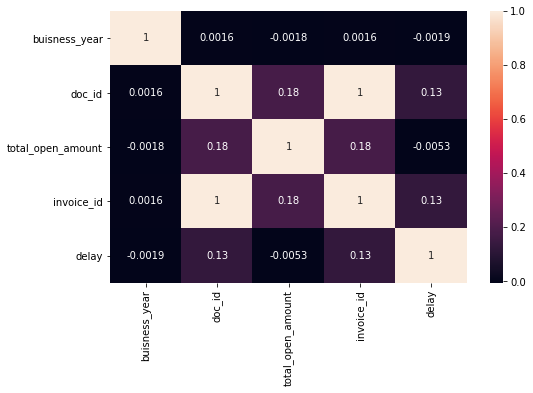

In [ ]:
## For better visualization of the correlation plotting a heatmap

import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize=(8,5))
sns.heatmap(corr,annot=True)

Inference: Visualizing the correlation of different columns with target column

`doc_id` and `invoice_id` showing high correlation with delay but they are dropped off from the x_train set as they are the primary keys.

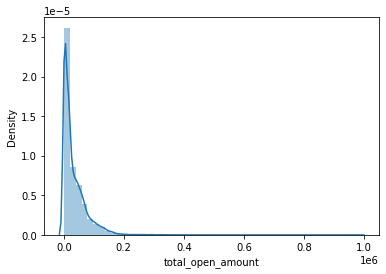

In [ ]:
## Plotting the graph on total_open_amount

sns.distplot(x_train['total_open_amount'])

Inference: We can see that the total_open_amount is positively(right) skewed

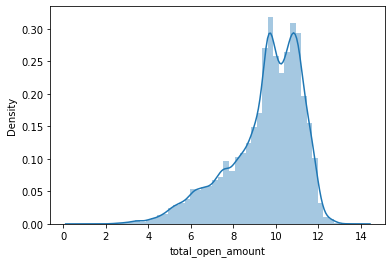

In [ ]:
## Plotting the graph on total_open_amount after applying log function

sns.distplot(np.log(x_train['total_open_amount']))

Inference: Now the data has become little negatively(left) skewed

So we need to perform diffrent operations

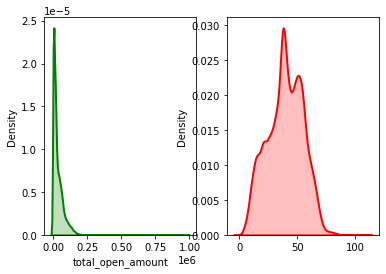

In [ ]:
## Plotting the graph on total_open_amount after applying boxcox function

fitted_data, fitted_lambda = stats.boxcox(x_train['total_open_amount'])
fig, ax = plt.subplots(1, 2) 
sns.distplot(x_train['total_open_amount'], hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Non-Normal", color ="green", ax = ax[0]) 
sns.distplot(fitted_data, hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Normal", color ="red", ax = ax[1])  

Inference: The `green` graph shows total_open_amount without any operation.
The `red` graph shows total_open_amount after applying boxcox operation 

We can see that now the graph has become normalize than before.

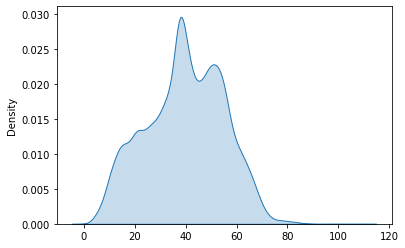

In [ ]:
## Plotting total_open_amount with boxcox transformation

sns.kdeplot(fitted_data,shade=True)

BoxCox transformation can be applied to remove skewness here.

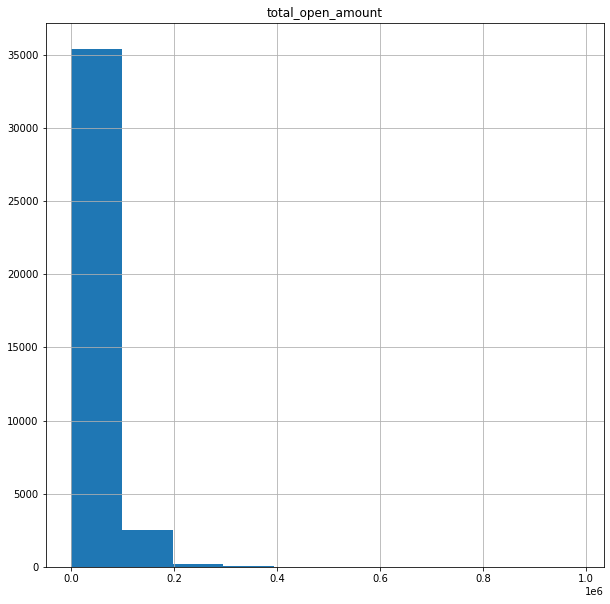

In [ ]:
## Plotting histogram for total_open_amount

hist = x_train.hist(bins=10,figsize =(10,10))

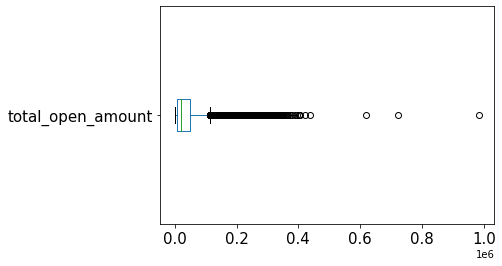

In [ ]:
## Plotting boxplot for total_open_amount

boxplot = x_train.boxplot(grid=False, vert=False,fontsize=15)

Inference: We can see the many outliers in the `total_open_amount`

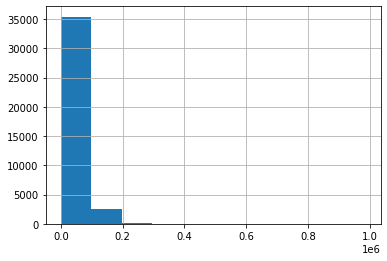

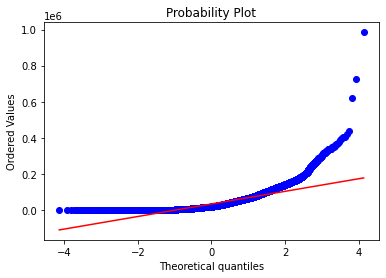

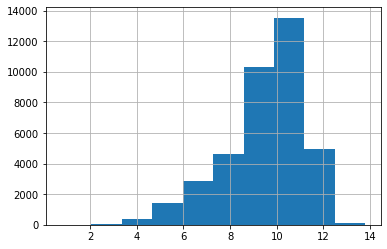

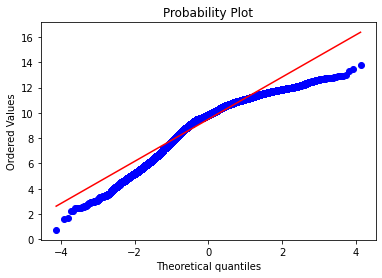

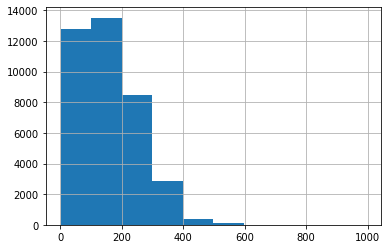

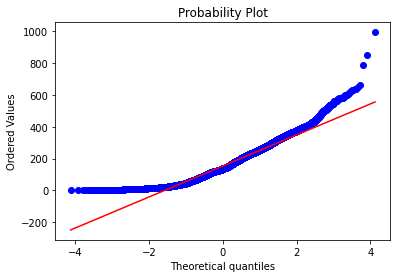

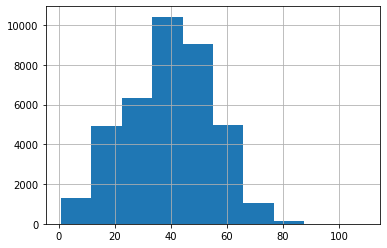

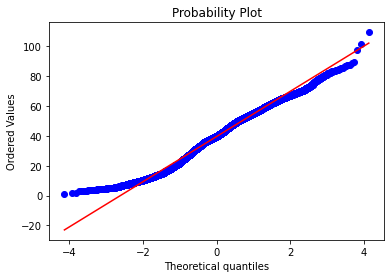

In [ ]:
## Plotting histogram and probability curve to check which is the best method suited for removing skewness.

x = x_train['total_open_amount']

# the distribution for x
pd.Series(x).hist()
plt.show()
stats.probplot(x, dist="norm", plot=pylab)
pylab.show()

# log transformation
pd.Series(np.log(x)).hist()
plt.show()
stats.probplot(np.log(x), dist="norm", plot=pylab)
pylab.show()

# sqrt transformation
pd.Series(np.sqrt(x)).hist()
plt.show()
stats.probplot(np.sqrt(x), dist="norm", plot=pylab)
pylab.show()

#  box-cox transformation
x_bc, lmda = stats.boxcox(x)
pd.Series(x_bc).hist()
plt.show()
stats.probplot(x_bc, dist="norm", plot=pylab)
pylab.show()

Inference: Here we can see that boxcox transformation siuted the best among all.


In [ ]:
## Extracting day,month,quarter and dayofweek from different daytime datatype column 

train['due_day'] =train['due_in_date'].dt.day
train['due_month'] = train['due_in_date'].dt.month
train['due_quarter'] = train['due_in_date'].dt.quarter
train['due_weekday'] = train['due_in_date'].dt.dayofweek

train['baseline_day'] = train['baseline_create_date'].dt.day
train['baseline_month'] = train['baseline_create_date'].dt.month
train['baseline_quarter'] = train['baseline_create_date'].dt.quarter
train['baseline_weekday'] = train['baseline_create_date'].dt.dayofweek

train['doc_create_day'] = train['document_create_date.1'].dt.day
train['doc_create_month'] = train['document_create_date.1'].dt.month
train['doc_create_quarter'] = train['document_create_date.1'].dt.quarter
train['doc_create_weekday'] = train['document_create_date.1'].dt.dayofweek

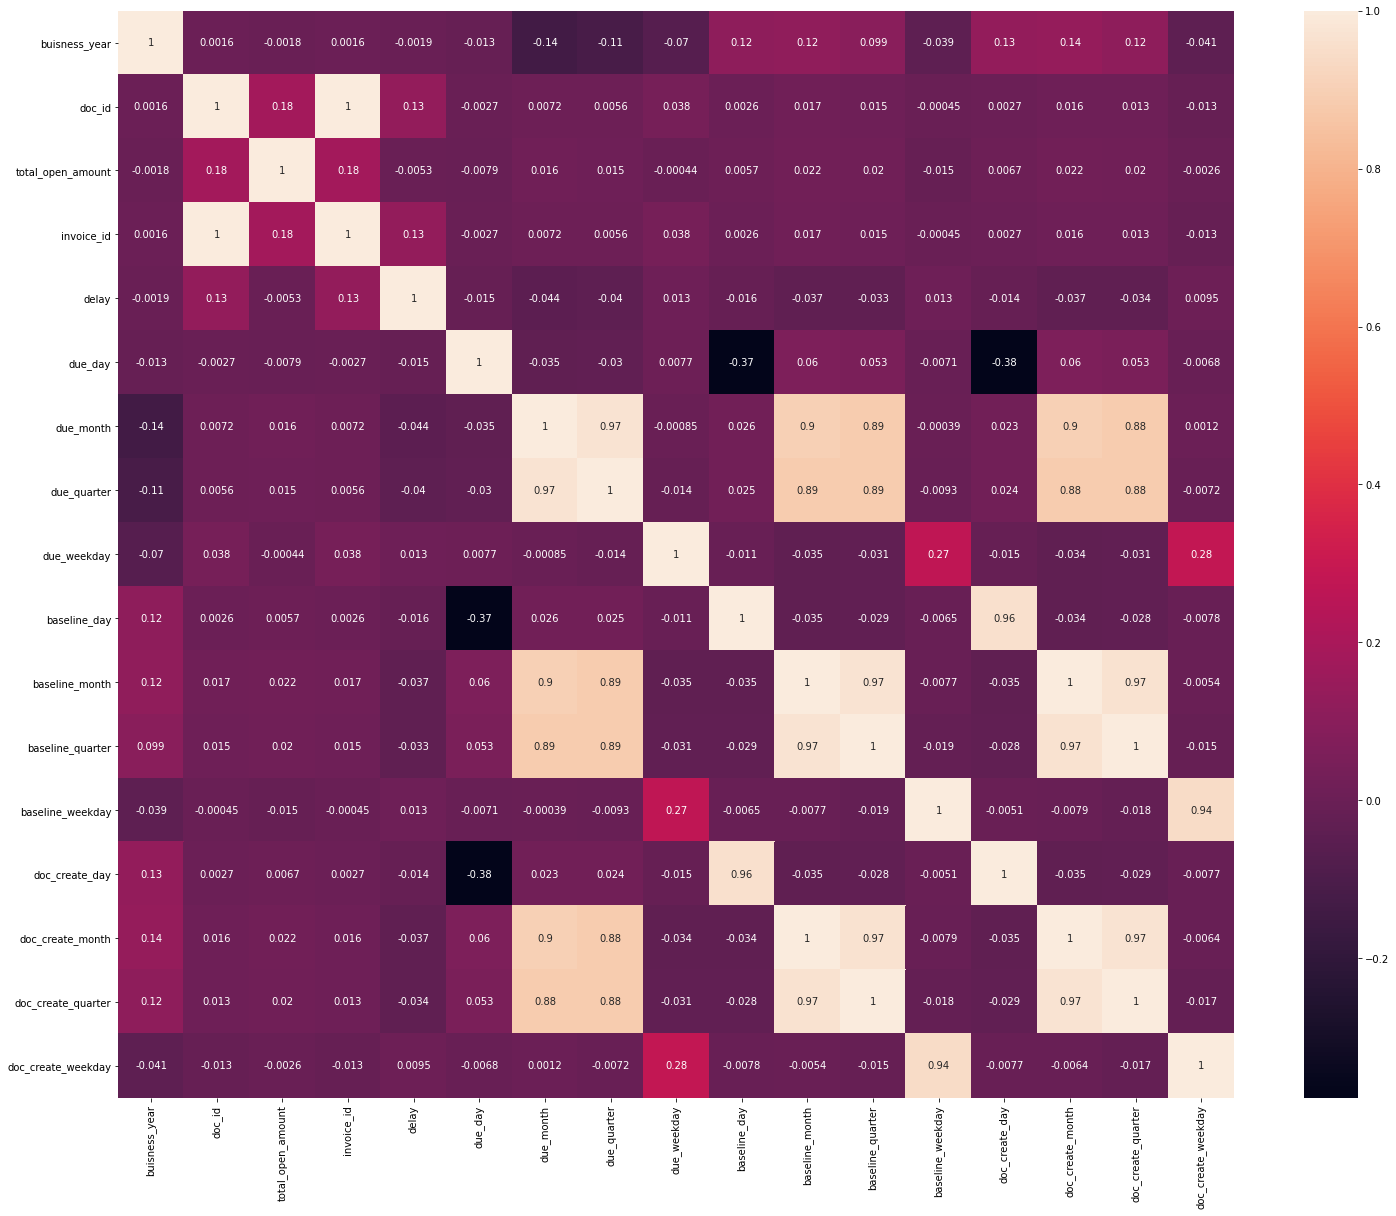

In [ ]:
## Checking the correlation of daytime column with the target variable by plotting a heatmap

corr_train=train.corr()
plt.subplots(figsize=(25,20))
sns.heatmap(corr_train,annot=True)

Inference: All the columns show different correraltion with the target column
Here we have not used clear_date as in main test dataset we don't have this column and we have to predict so deriving any correlation with it will not be beneficial. 


##Using group by function checking the aggeration of different columns

In [ ]:
## Applying groupby function on the cust_number and delay 

agg_cust_num = train.groupby(["cust_number"])["delay"].agg({"count","mean","median"})
agg_cust_num

,median,mean,count
cust_number,,,
0100000051,-3.0,-5.000000,4
0100000158,-44.0,-44.000000,2
0100000217,-5.0,-5.000000,1
0100000222,-3.0,-0.629630,27
0100000272,11.0,11.000000,2
...,...,...,...
CCCA02,7.0,7.155361,457
CCMX11,93.0,93.000000,1
CCU001,9.0,8.193548,31


In [ ]:
## Applying groupby function on the name_customer and delay

agg_name_customer = train.groupby(["name_customer"])["delay"].agg({np.mean,np.median,pd.Series.mode})
agg_name_customer

,median,mode,mean
name_customer,,,
10167 corporation,1.0,1,1.0
10167 systems,4.0,"[1.0, 7.0]",4.0
11-17 llc,9.0,9,9.0
17135,-1.0,-1,-1.0
17135 us,-1.0,-1,-1.0
...,...,...,...
Y H trust,0.5,"[-1.0, 2.0]",0.5
YEN BROS associates,3.5,"[0.0, 7.0]",3.5
YEN BROS co,0.0,0,0.0


In [ ]:
## Applying groupby function on the cust_payment_terms and delay

agg_cust_payment_terms = train.groupby(["cust_payment_terms"])["delay"].agg({"count","mean","median"})
agg_cust_payment_terms

,median,mean,count
cust_payment_terms,,,
90M7,-69.5,-69.500000,2
B030,93.0,93.000000,1
B052,-13.5,-12.000000,4
B112,5.0,5.000000,1
BR12,-9.0,-9.000000,2
...,...,...,...
NAWM,4.0,4.000000,5
NAWN,0.0,-6.134615,104
NAWP,-8.0,-8.155172,58


Inference: Here we can see that how values of different categorical columns have relation with the delay.

##Building the heat map and correlation for all the columns(object, float and int)

In [ ]:
##Applying encoding to all the categorical data and ploting a heat map and 
##deriving correlation between all the items to delay(target variable)

tr = pd.DataFrame(train)
tr['cust_payment_terms'] =tr['cust_payment_terms'].astype('category').cat.codes
tr['document type'] =tr['document type'].astype('category').cat.codes
tr['invoice_currency'] =tr['invoice_currency'].astype('category').cat.codes
tr['name_customer'] =tr['name_customer'].astype('category').cat.codes
tr['business_code'] =tr['business_code'].astype('category').cat.codes

In [ ]:
## Checking how diffrent columns are correlated with the target column

tr[tr.columns[1:]].corr()['delay'][:]

name_customer        -0.046085
buisness_year        -0.001865
doc_id                0.131232
invoice_currency     -0.128670
document type              NaN
total_open_amount    -0.005299
cust_payment_terms    0.052021
invoice_id            0.131232
delay                 1.000000
due_day              -0.015255
due_month            -0.043538
due_quarter          -0.040137
due_weekday           0.012851
baseline_day         -0.015534
baseline_month       -0.036616
baseline_quarter     -0.033111
baseline_weekday      0.013025
doc_create_day       -0.013838
doc_create_month     -0.036737
doc_create_quarter   -0.033542
doc_create_weekday    0.009523
Name: delay, dtype: float64

In [ ]:
## Checking the correlation of all the columns with each other
## Making a correlation matrix

corr1_train=tr[tr.columns[1:]].corr()
corr1_train

,name_customer,buisness_year,doc_id,invoice_currency,document type,total_open_amount,cust_payment_terms,invoice_id,delay,due_day,due_month,due_quarter,due_weekday,baseline_day,baseline_month,baseline_quarter,baseline_weekday,doc_create_day,doc_create_month,doc_create_quarter,doc_create_weekday
name_customer,1.000000,-0.007815,-0.035576,0.033872,NaN,-0.046563,0.200504,-0.035576,-0.046085,0.007515,-0.010121,-0.010834,0.016877,-0.009999,0.002427,0.001153,0.100644,-0.008448,0.001925,0.000763,0.101784
buisness_year,-0.007815,1.000000,0.001613,-0.001618,NaN,-0.001807,-0.012998,0.001613,-0.001865,-0.012994,-0.137060,-0.114858,-0.069632,0.115604,0.119531,0.099125,-0.038713,0.131634,0.139057,0.115311,-0.040576
doc_id,-0.035576,0.001613,1.000000,-0.999599,NaN,0.180593,-0.551872,1.000000,0.131232,-0.002724,0.007193,0.005614,0.037740,0.002618,0.016704,0.015186,-0.000451,0.002660,0.015642,0.012936,-0.012510
invoice_currency,0.033872,-0.001618,-0.999599,1.000000,NaN,-0.181333,0.558403,-0.999599,-0.128670,0.002739,-0.005606,-0.004095,-0.038194,-0.002358,-0.015891,-0.014402,0.000850,-0.002408,-0.014827,-0.012149,0.012897
document type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_open_amount,-0.046563,-0.001807,0.180593,-0.181333,NaN,1.000000,-0.198333,0.180593,-0.005299,-0.007868,0.016478,0.014917,-0.000439,0.005717,0.022495,0.020125,-0.014906,0.006735,0.021955,0.019703,-0.002632
cust_payment_terms,0.200504,-0.012998,-0.551872,0.558403,NaN,-0.198333,1.000000,-0.551872,0.052021,0.001515,0.021760,0.021938,-0.031922,-0.002940,-0.006681,-0.007339,0.094629,-0.002965,-0.006349,-0.006243,0.098754
invoice_id,-0.035576,0.001613,1.000000,-0.999599,NaN,0.180593,-0.551872,1.000000,0.131232,-0.002724,0.007193,0.005614,0.037740,0.002618,0.016704,0.015186,-0.000451,0.002660,0.015642,0.012936,-0.012510
delay,-0.046085,-0.001865,0.131232,-0.128670,NaN,-0.005299,0.052021,0.131232,1.000000,-0.015255,-0.043538,-0.040137,0.012851,-0.015534,-0.036616,-0.033111,0.013025,-0.013838,-0.036737,-0.033542,0.009523
due_day,0.007515,-0.012994,-0.002724,0.002739,NaN,-0.007868,0.001515,-0.002724,-0.015255,1.000000,-0.035261,-0.029636,0.007741,-0.371810,0.059882,0.053095,-0.007109,-0.376627,0.060198,0.053353,-0.006837


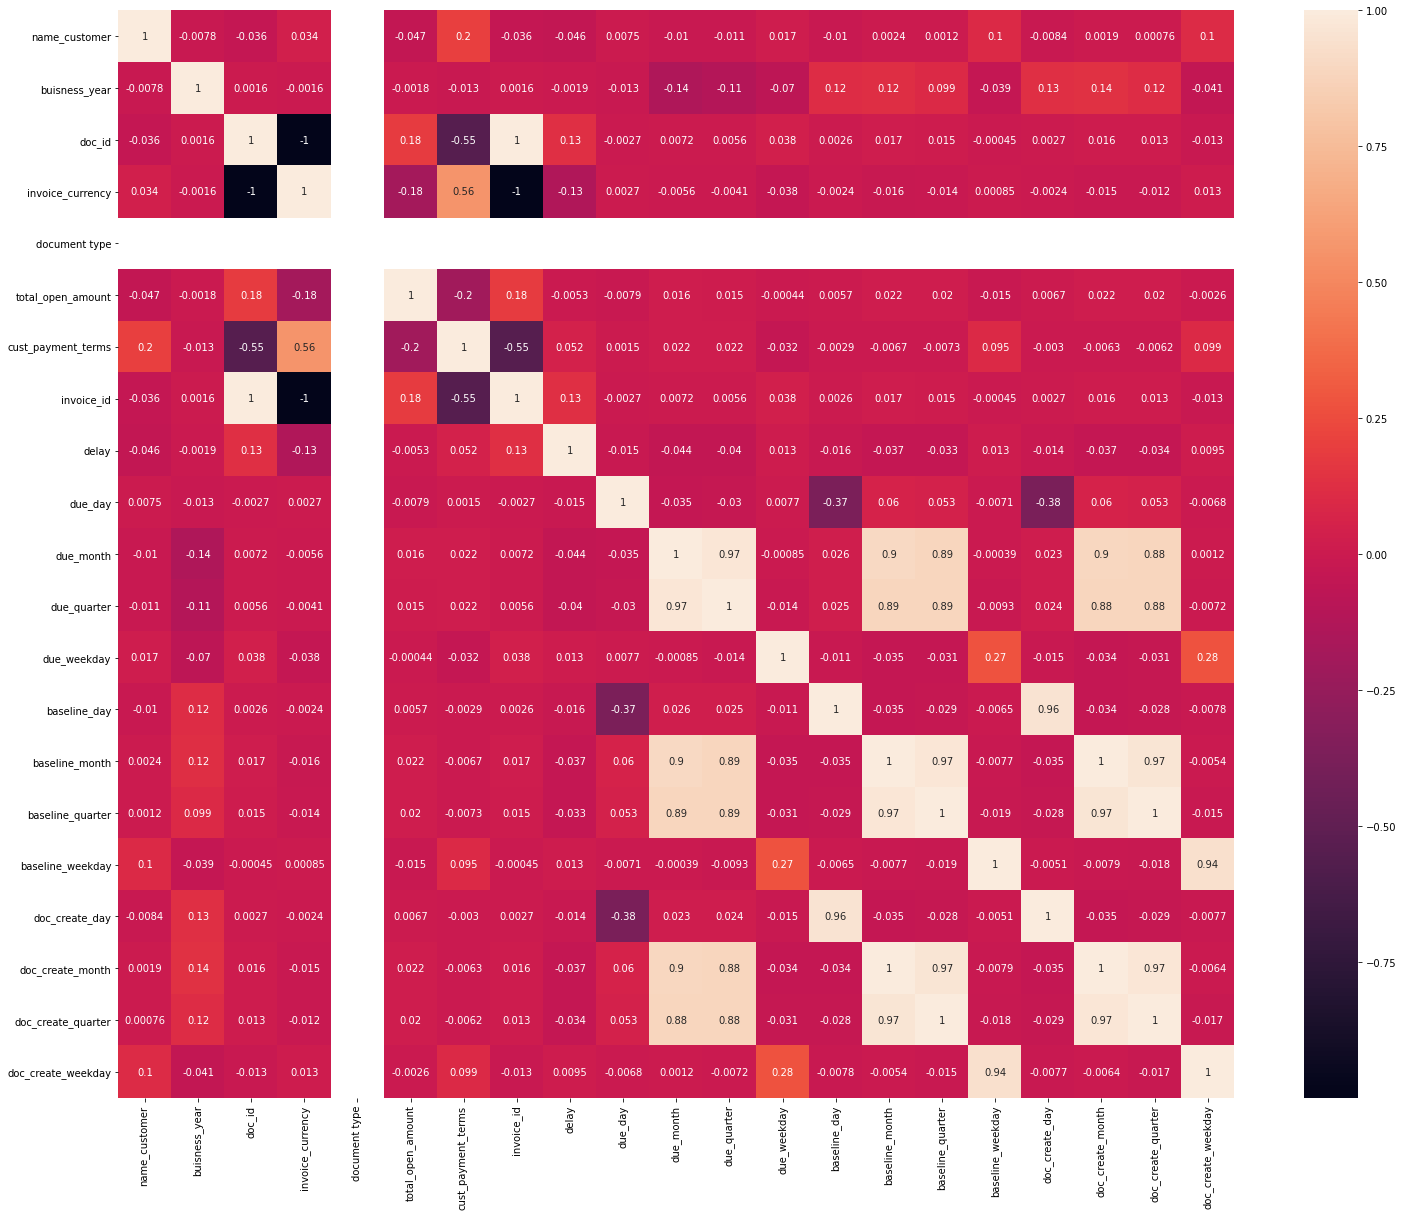

In [ ]:
## Plotting a heat map to visualize the correlation

plt.subplots(figsize=(25,20))
sns.heatmap(corr1_train,annot=True)

Inference: We can visualize the correlation of different columns and now we need to apply different encoding techniques on train, validation and test set for proper model building. 

##**Feature Engineering**

##Extracting month,quarter and dayofweek from datetime column

In [ ]:
## Extracting month, quarter and dayofweek from due_in_date, baseline_create_date and document_create_date.1 in x_train
## Doing so as we have seen the correlation of these with target  in the EDA

x_train['due_month'] = x_train['due_in_date'].dt.month
x_train['due_quarter'] = x_train['due_in_date'].dt.quarter
x_train['due_weekday'] = x_train['due_in_date'].dt.dayofweek

x_train['baseline_month'] = x_train['baseline_create_date'].dt.month
x_train['baseline_quarter'] = x_train['baseline_create_date'].dt.quarter
x_train['baseline_weekday'] = x_train['baseline_create_date'].dt.dayofweek

x_train['doc_create_month'] = x_train['document_create_date.1'].dt.month
x_train['doc_create_quarter'] = x_train['document_create_date.1'].dt.quarter
x_train['doc_create_weekday'] = x_train['document_create_date.1'].dt.dayofweek

In [ ]:
## Getting the summary of x_train

x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38162 entries, 0 to 38161
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   cust_number             38162 non-null  object        
 1   name_customer           38162 non-null  object        
 2   clear_date              38162 non-null  datetime64[ns]
 3   document_create_date.1  38162 non-null  datetime64[ns]
 4   due_in_date             38162 non-null  datetime64[ns]
 5   invoice_currency        38162 non-null  object        
 6   total_open_amount       38162 non-null  float64       
 7   baseline_create_date    38162 non-null  datetime64[ns]
 8   cust_payment_terms      38162 non-null  object        
 9   due_month               38162 non-null  int64         
 10  due_quarter             38162 non-null  int64         
 11  due_weekday             38162 non-null  int64         
 12  baseline_month          38162 non-null  int64 

In [ ]:
## Printing the count of unique values present in each column

print(x_train.nunique())

cust_number                1356
name_customer              3903
clear_date                  323
document_create_date.1      363
due_in_date                 396
invoice_currency              2
total_open_amount         34698
baseline_create_date        371
cust_payment_terms           63
due_month                    12
due_quarter                   4
due_weekday                   7
baseline_month               12
baseline_quarter              4
baseline_weekday              7
doc_create_month             12
doc_create_quarter            4
doc_create_weekday            7
dtype: int64


In [ ]:
## Checking for the Null values in x_train

print(x_train.isna().sum())

cust_number               0
name_customer             0
clear_date                0
document_create_date.1    0
due_in_date               0
invoice_currency          0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
due_month                 0
due_quarter               0
due_weekday               0
baseline_month            0
baseline_quarter          0
baseline_weekday          0
doc_create_month          0
doc_create_quarter        0
doc_create_weekday        0
dtype: int64


In [ ]:
## Extracting month, quarter and dayofweek from due_in_date, baseline_create_date and document_create_date.1 in x_validation

x_validation['due_month'] = x_validation['due_in_date'].dt.month
x_validation['due_quarter'] = x_validation['due_in_date'].dt.quarter
x_validation['due_weekday'] = x_validation['due_in_date'].dt.dayofweek

x_validation['baseline_month'] = x_validation['baseline_create_date'].dt.month
x_validation['baseline_quarter'] = x_validation['baseline_create_date'].dt.quarter
x_validation['baseline_weekday'] = x_validation['baseline_create_date'].dt.dayofweek

x_validation['doc_create_month'] = x_validation['document_create_date.1'].dt.month
x_validation['doc_create_quarter'] = x_validation['document_create_date.1'].dt.quarter
x_validation['doc_create_weekday'] = x_validation['document_create_date.1'].dt.dayofweek

In [ ]:
## Extracting month, quarter and dayofweek from due_in_date, baseline_create_date and document_create_date.1 in x_test

x_test['due_month'] = x_test['due_in_date'].dt.month
x_test['due_quarter'] = x_test['due_in_date'].dt.quarter
x_test['due_weekday'] = x_test['due_in_date'].dt.dayofweek

x_test['baseline_month'] = x_test['baseline_create_date'].dt.month
x_test['baseline_quarter'] = x_test['baseline_create_date'].dt.quarter
x_test['baseline_weekday'] = x_test['baseline_create_date'].dt.dayofweek

x_test['doc_create_month'] = x_test['document_create_date.1'].dt.month
x_test['doc_create_quarter'] = x_test['document_create_date.1'].dt.quarter
x_test['doc_create_weekday'] = x_test['document_create_date.1'].dt.dayofweek

In [ ]:
## Getting the summary of x_validation

x_validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2898 entries, 0 to 2897
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   cust_number             2898 non-null   object        
 1   name_customer           2898 non-null   object        
 2   clear_date              2898 non-null   datetime64[ns]
 3   document_create_date.1  2898 non-null   datetime64[ns]
 4   due_in_date             2898 non-null   datetime64[ns]
 5   invoice_currency        2898 non-null   object        
 6   total_open_amount       2898 non-null   float64       
 7   baseline_create_date    2898 non-null   datetime64[ns]
 8   cust_payment_terms      2898 non-null   object        
 9   due_month               2898 non-null   int64         
 10  due_quarter             2898 non-null   int64         
 11  due_weekday             2898 non-null   int64         
 12  baseline_month          2898 non-null   int64   

In [ ]:
## Getting the summary of x_test

x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2724 entries, 0 to 2723
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   cust_number             2724 non-null   object        
 1   name_customer           2724 non-null   object        
 2   clear_date              2724 non-null   datetime64[ns]
 3   document_create_date.1  2724 non-null   datetime64[ns]
 4   due_in_date             2724 non-null   datetime64[ns]
 5   invoice_currency        2724 non-null   object        
 6   total_open_amount       2724 non-null   float64       
 7   baseline_create_date    2724 non-null   datetime64[ns]
 8   cust_payment_terms      2724 non-null   object        
 9   due_month               2724 non-null   int64         
 10  due_quarter             2724 non-null   int64         
 11  due_weekday             2724 non-null   int64         
 12  baseline_month          2724 non-null   int64   

##Encoding the categorical columns

**Label encoding on `cust_payment_terms`,`cust_number` and `name_customer`**

`fit()` : used for generating learning model parameters from training data

`transform()` : parameters generated from fit() method,applied upon model to generate transformed data set.

`fit_transform()` : combination of fit() and transform() api on same data set

In [ ]:
## Applying label encoding on the categorical column

le = LabelEncoder()   

In [ ]:
## Getting all the unique values from cust_payment_terms and then counting them and setting a threshold value and storing them into
## seperate variables 
## final_labels contain the unique cust_payment_terms which are above the threshold value 
## Terming all the values below the threshold as others

Labels = x_train['cust_payment_terms'].unique()
Data = x_train['cust_payment_terms'].value_counts()
threshold_val = 0.01 * x_train['cust_payment_terms'].value_counts().max()
final_labels = [x for x in Labels if Data[x]>threshold_val]
x_train['cust_payment_terms_label'] = pd.Series([x if x in final_labels else 'others' for x in x_train['cust_payment_terms']])
x_validation['cust_payment_terms_label'] = pd.Series([x if x in final_labels else 'others' for x in x_validation['cust_payment_terms']])
x_test['cust_payment_terms_label'] = pd.Series([x if x in final_labels else 'others' for x in x_test['cust_payment_terms']])

In [ ]:
## Applying fit_transform in x_train and transform in x_validation and x_test 
## Storing all the encoded data in a new column name cust_payment_terms_label

x_train['cust_payment_terms_label']= le.fit_transform(x_train['cust_payment_terms_label'])
x_validation['cust_payment_terms_label']= le.transform(x_validation['cust_payment_terms_label'])
x_test['cust_payment_terms_label']= le.transform(x_test['cust_payment_terms_label'])

In [ ]:
## Printing the first 5 values of the column cust_payment_terms_label in x_train

x_train['cust_payment_terms_label'].head()

0     3
1     3
2     0
3     3
4    11
Name: cust_payment_terms_label, dtype: int64

In [ ]:
## Getting all the unique values from name_customer and then counting them and setting a threshold value and storing them into
## seperate variables 
## final_labels contain the unique name_customer which are above the threshold value 
## Terming all the values below the threshold as others

Labels = x_train['name_customer'].unique()
Data = x_train['name_customer'].value_counts()
threshold_val = 0.01 * x_train['name_customer'].value_counts().max()
final_labels = [x for x in Labels if Data[x]>threshold_val]
x_train['name_customer_label'] = pd.Series([x if x in final_labels else 'others' for x in x_train['name_customer']])
x_validation['name_customer_label'] = pd.Series([x if x in final_labels else 'others' for x in x_validation['name_customer']])
x_test['name_customer_label'] = pd.Series([x if x in final_labels else 'others' for x in x_test['name_customer']])

In [ ]:
## Applying fit_transform in x_train and transform in x_validation and x_test 
## Storing all the encoded data in a new column name name_customer_label

x_train['name_customer_label'] = le.fit_transform(x_train['name_customer_label'])
x_validation['name_customer_label'] = le.transform(x_validation['name_customer_label'])
x_test['name_customer_label'] = le.transform(x_test['name_customer_label'])

In [ ]:
## Printing the first 5 values of the column name_customer_label in x_train

x_train['name_customer_label'].head()

0    613
1     33
2    657
3    683
4    667
Name: name_customer_label, dtype: int64

In [ ]:
## Getting all the unique values from cust_number and then counting them and setting a threshold value and storing them into
## seperate variables 
## final_labels contain the unique cust_number which are above the threshold value 
## Terming all the values below the threshold as others

Labels = x_train['cust_number'].unique()
Data = x_train['cust_number'].value_counts()
threshold_val = 0.01 * x_train['cust_number'].value_counts().max()
final_labels = [x for x in Labels if Data[x]>threshold_val]
x_train['cust_number_label'] = pd.Series([x if x in final_labels else 'others' for x in x_train['cust_number']])
x_validation['cust_number_label'] = pd.Series([x if x in final_labels else 'others' for x in x_validation['cust_number']])
x_test['cust_number_label'] = pd.Series([x if x in final_labels else 'others' for x in x_test['cust_number']])

In [ ]:
## Applying fit_transform in x_train and transform in x_validation and x_test 
## Storing all the encoded data in a new column name cust_number_label

x_train['cust_number_label']= le.fit_transform(x_train['cust_number_label'])
x_validation['cust_number_label']= le.transform(x_validation['cust_number_label'])
x_test['cust_number_label']= le.transform(x_test['cust_number_label'])

In [ ]:
## Printing the first 5 values of the column cust_number_label in x_train

x_train['cust_number_label'].head()

0    33
1    13
2     7
3    22
4    41
Name: cust_number_label, dtype: int64

In [ ]:
## Getting the summary of x_train

x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38162 entries, 0 to 38161
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   cust_number               38162 non-null  object        
 1   name_customer             38162 non-null  object        
 2   clear_date                38162 non-null  datetime64[ns]
 3   document_create_date.1    38162 non-null  datetime64[ns]
 4   due_in_date               38162 non-null  datetime64[ns]
 5   invoice_currency          38162 non-null  object        
 6   total_open_amount         38162 non-null  float64       
 7   baseline_create_date      38162 non-null  datetime64[ns]
 8   cust_payment_terms        38162 non-null  object        
 9   due_month                 38162 non-null  int64         
 10  due_quarter               38162 non-null  int64         
 11  due_weekday               38162 non-null  int64         
 12  baseline_month    

In [ ]:
## Checking for the number of unique values in the x_train after encoding

x_train.nunique()

cust_number                  1356
name_customer                3903
clear_date                    323
document_create_date.1        363
due_in_date                   396
invoice_currency                2
total_open_amount           34698
baseline_create_date          371
cust_payment_terms             63
due_month                      12
due_quarter                     4
due_weekday                     7
baseline_month                 12
baseline_quarter                4
baseline_weekday                7
doc_create_month               12
doc_create_quarter              4
doc_create_weekday              7
cust_payment_terms_label       17
name_customer_label           694
cust_number_label              70
dtype: int64

## Conversion of Currency type of `total_open_amount`

In [ ]:
## Converting CAD to USD to maintain uniformity in the currency and storing it into a new column in x_train

x_train['total_open_amount_updated'] = np.where(x_train['invoice_currency'] == 'CAD', x_train['total_open_amount'].multiply(0.78),x_train['total_open_amount'] )
x_train['invoice_currency_updated'] = np.where(x_train['invoice_currency'] == 'CAD', 'USD','USD')

In [ ]:
## Checking for the number of unique values in the x_train after conversion

x_train.nunique()

cust_number                   1356
name_customer                 3903
clear_date                     323
document_create_date.1         363
due_in_date                    396
invoice_currency                 2
total_open_amount            34698
baseline_create_date           371
cust_payment_terms              63
due_month                       12
due_quarter                      4
due_weekday                      7
baseline_month                  12
baseline_quarter                 4
baseline_weekday                 7
doc_create_month                12
doc_create_quarter               4
doc_create_weekday               7
cust_payment_terms_label        17
name_customer_label            694
cust_number_label               70
total_open_amount_updated    34710
invoice_currency_updated         1
dtype: int64

In [ ]:
## Converting CAD to USD to maintain uniformity in the currency and storing it into a new column in x_validation

x_validation['total_open_amount_updated'] = np.where(x_validation['invoice_currency'] == 'CAD', x_validation['total_open_amount'].multiply(0.78),x_validation['total_open_amount'] )
x_validation['invoice_currency_updated'] = np.where(x_validation['invoice_currency'] == 'CAD', 'USD','USD')

In [ ]:
## Converting CAD to USD to maintain uniformity in the currency and storing it into a new column in x_test

x_test['total_open_amount_updated'] = np.where(x_test['invoice_currency'] == 'CAD', x_test['total_open_amount'].multiply(0.78),x_test['total_open_amount'] )
x_test['invoice_currency_updated'] = np.where(x_test['invoice_currency'] == 'CAD', 'USD','USD')

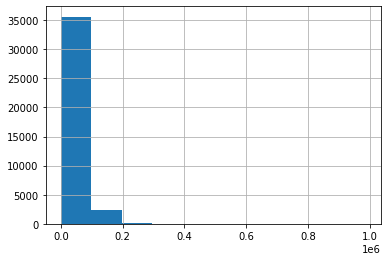

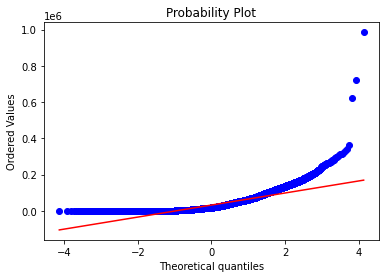

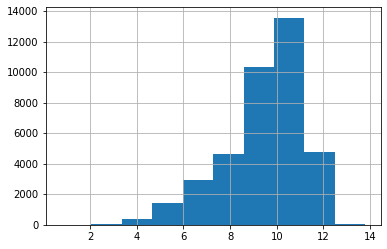

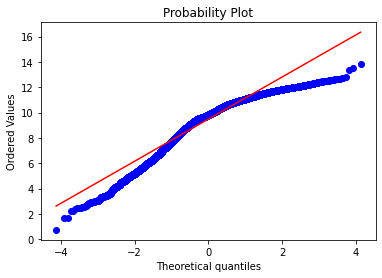

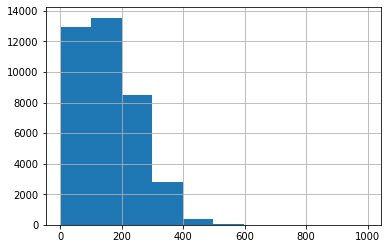

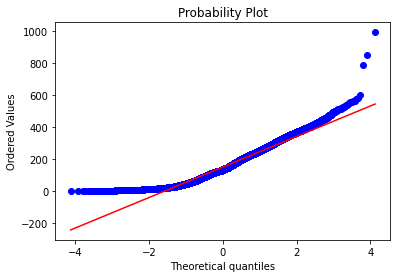

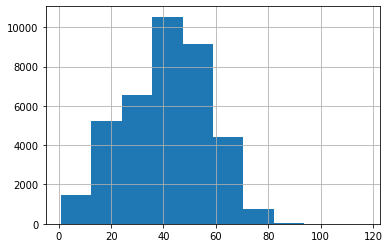

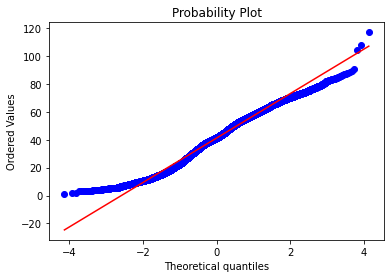

In [ ]:
## Checking which trnsformation suits on total_open_amount_updated as it is skewed

x = x_train['total_open_amount_updated']

# distribution for x
pd.Series(x).hist()
plt.show()
stats.probplot(x, dist="norm", plot=pylab)
pylab.show()

#  log transformation
pd.Series(np.log(x)).hist()
plt.show()
stats.probplot(np.log(x), dist="norm", plot=pylab)
pylab.show()

# sqrt transformation
pd.Series(np.sqrt(x)).hist()
plt.show()
stats.probplot(np.sqrt(x), dist="norm", plot=pylab)
pylab.show()

# box-cox transformation
x_bc, lmda = stats.boxcox(x)
pd.Series(x_bc).hist()
plt.show()
stats.probplot(x_bc, dist="norm", plot=pylab)
pylab.show()

Inference: We can apply boxcox as it suits the best

In [ ]:
## Printing the x_train dataframe

x_train

,cust_number,name_customer,clear_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,due_month,due_quarter,due_weekday,baseline_month,baseline_quarter,baseline_weekday,doc_create_month,doc_create_quarter,doc_create_weekday,cust_payment_terms_label,name_customer_label,cust_number_label,total_open_amount_updated,invoice_currency_updated
0,0200744019,TARG trust,2019-01-11,2018-12-30,2019-01-14,USD,15975.20,2018-12-30,NAA8,1,1,0,12,4,6,12,4,6,3,613,33,15975.2000,USD
1,0200418007,AM trust,2019-01-15,2018-12-30,2019-01-14,USD,136583.30,2018-12-30,NAA8,1,1,0,12,4,6,12,4,6,3,33,13,136583.3000,USD
2,0140106408,WAL-M foundation,2019-01-25,2018-12-30,2019-01-09,CAD,98970.61,2018-12-30,CA10,1,1,2,12,4,6,12,4,6,0,657,7,77197.0758,USD
3,0200706844,WINC associates,2019-01-14,2018-12-30,2019-01-14,USD,5872.32,2018-12-30,NAA8,1,1,0,12,4,6,12,4,6,3,683,22,5872.3200,USD
4,0200769623,WAL-MAR corporation,2019-01-09,2018-12-30,2019-01-14,USD,10877.70,2018-12-30,NAH4,1,1,0,12,4,6,12,4,6,11,667,41,10877.7000,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38157,0200769623,WAL-MAR associates,2020-01-16,2019-12-31,2020-01-15,USD,45725.14,2019-12-31,NAH4,1,1,2,12,4,1,12,4,1,11,664,41,45725.1400,USD
38158,0200726979,BJ'S associates,2020-01-15,2019-12-31,2020-01-15,USD,519.69,2019-12-31,NAA8,1,1,2,12,4,1,12,4,1,3,52,27,519.6900,USD
38159,0200337148,COAS foundation,2020-01-15,2019-12-31,2020-01-15,USD,23609.54,2019-12-31,NAA8,1,1,2,12,4,1,12,4,1,3,93,12,23609.5400,USD
38160,0200729942,SA in,2020-01-14,2019-12-31,2020-01-15,USD,10162.65,2019-12-31,NAA8,1,1,2,12,4,1,12,4,1,3,483,29,10162.6500,USD


In [ ]:
## Sumaring the x_train after performing some operations

x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38162 entries, 0 to 38161
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   cust_number                38162 non-null  object        
 1   name_customer              38162 non-null  object        
 2   clear_date                 38162 non-null  datetime64[ns]
 3   document_create_date.1     38162 non-null  datetime64[ns]
 4   due_in_date                38162 non-null  datetime64[ns]
 5   invoice_currency           38162 non-null  object        
 6   total_open_amount          38162 non-null  float64       
 7   baseline_create_date       38162 non-null  datetime64[ns]
 8   cust_payment_terms         38162 non-null  object        
 9   due_month                  38162 non-null  int64         
 10  due_quarter                38162 non-null  int64         
 11  due_weekday                38162 non-null  int64         
 12  base

In [ ]:
## Dropping off the old columns which have been now encoded or transformed and which have object or datetime datatype from x_train
## Creating a new x_train with all modified columns 

x_train1=x_train.drop(['clear_date',  'document_create_date.1', 'due_in_date','total_open_amount','baseline_create_date','invoice_currency_updated','invoice_currency','cust_payment_terms','cust_number','name_customer'], axis = 1,inplace = False).copy()

In [ ]:
## Dropping off the old columns which have been now encoded or transformed and which have object or datetime datatype from x_test
## Creating a new x_test with all modified columns 

x_test1=x_test.drop(['clear_date',  'document_create_date.1', 'due_in_date','total_open_amount','baseline_create_date','invoice_currency_updated','invoice_currency','cust_payment_terms','cust_number','name_customer'], axis = 1,inplace = False).copy()

In [ ]:
## Dropping off the old columns which have been now encoded or transformed and which have object or datetime datatype from x_validation
## Creating a new x_validation with all modified columns 

x_validation1=x_validation.drop(['clear_date', 'document_create_date.1', 'due_in_date','total_open_amount','baseline_create_date','invoice_currency_updated','invoice_currency','cust_payment_terms','cust_number','name_customer'], axis = 1,inplace = False).copy()

In [ ]:
## Getting the summary of the new x_train set created

x_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38162 entries, 0 to 38161
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   due_month                  38162 non-null  int64  
 1   due_quarter                38162 non-null  int64  
 2   due_weekday                38162 non-null  int64  
 3   baseline_month             38162 non-null  int64  
 4   baseline_quarter           38162 non-null  int64  
 5   baseline_weekday           38162 non-null  int64  
 6   doc_create_month           38162 non-null  int64  
 7   doc_create_quarter         38162 non-null  int64  
 8   doc_create_weekday         38162 non-null  int64  
 9   cust_payment_terms_label   38162 non-null  int64  
 10  name_customer_label        38162 non-null  int64  
 11  cust_number_label          38162 non-null  int64  
 12  total_open_amount_updated  38162 non-null  float64
dtypes: float64(1), int64(12)
memory usage: 3.8 MB


##Removing the skewness of total open amount 

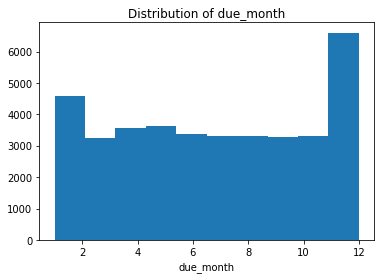

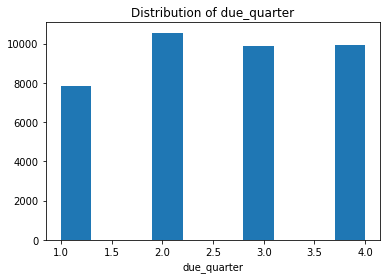

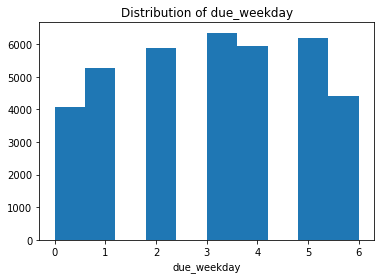

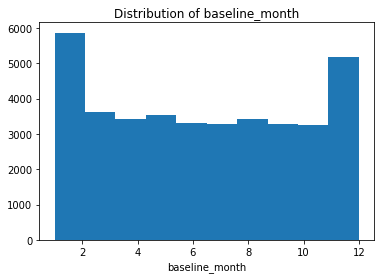

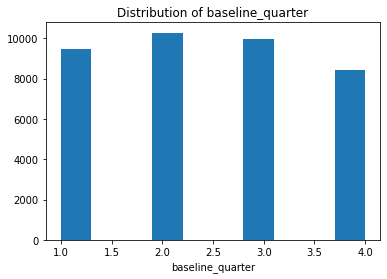

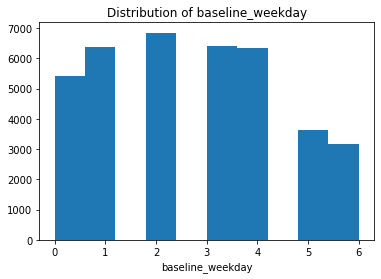

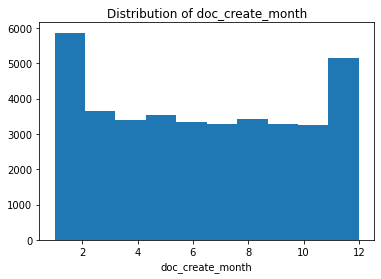

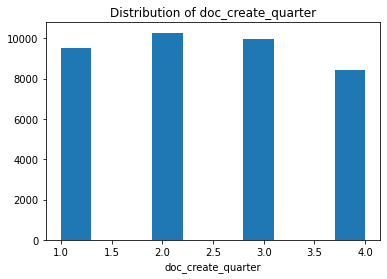

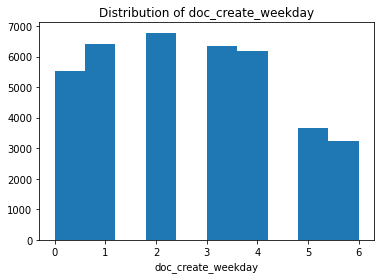

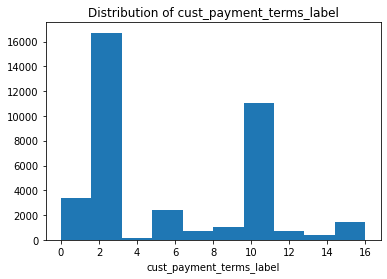

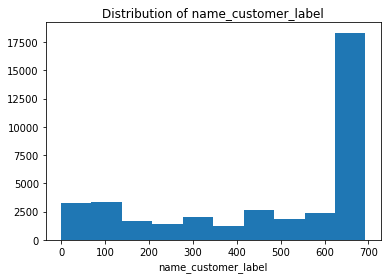

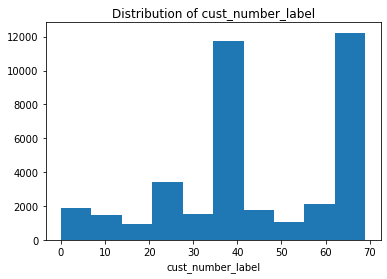

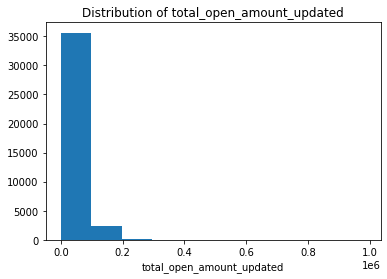

In [ ]:
## Checking for the distribution of different columns by plotting histogram 

for cols in x_train1:
    plt.hist(x_train1[cols])
    plt.xlabel(f'{cols}')
    plt.title(f'Distribution of {cols}')
    plt.show()

In [ ]:
## Checking the skewness of the columns present x_train

x_train1.skew()

due_month                   -0.017084
due_quarter                 -0.059253
due_weekday                 -0.054904
baseline_month               0.034378
baseline_quarter             0.052723
baseline_weekday             0.194335
doc_create_month             0.034183
doc_create_quarter           0.053391
doc_create_weekday           0.204188
cust_payment_terms_label     0.429108
name_customer_label         -0.712733
cust_number_label           -0.393178
total_open_amount_updated    2.537641
dtype: float64

As we can see that only `total_open_amount_updated` is highly skewed so we should treat the skewness

In [ ]:
## Applying boxcox transformation on total_open_amount_updated

x_train1['total_open_amount_updated'],fitted_lambda = stats.boxcox(x_train1['total_open_amount_updated'])

In [ ]:
## Checking the skewness after transforming

x_train1.skew()

due_month                   -0.017084
due_quarter                 -0.059253
due_weekday                 -0.054904
baseline_month               0.034378
baseline_quarter             0.052723
baseline_weekday             0.194335
doc_create_month             0.034183
doc_create_quarter           0.053391
doc_create_weekday           0.204188
cust_payment_terms_label     0.429108
name_customer_label         -0.712733
cust_number_label           -0.393178
total_open_amount_updated   -0.111136
dtype: float64

Now we can see that none of the column is highly skewed

##Feature Scaling the Dataset

###**Standardisation**

In [ ]:
# standarisation: we use the StandardScaler from sklearn
# fit_transform -> fit on the data - calc colum wise mean and transform on the data - formula application

scaler = StandardScaler() # create an object

X_train_scaled = scaler.fit_transform(x_train1)          # fit the scaler to the train set, and then transform it
X_train_scaled = pd.DataFrame(data=X_train_scaled, columns=['due_month',
        'due_quarter', 'due_weekday', 'baseline_month', 'baseline_quarter',
       'baseline_weekday', 'doc_create_month', 'doc_create_quarter',
       'doc_create_weekday', 'cust_payment_terms_label', 'name_customer_label',
       'cust_number_label', 'total_open_amount_updated'])

X_validation_scaled = scaler.fit_transform(x_validation1)   # fit the scaler to the validation set, and then transform it
X_validation_scaled = pd.DataFrame(data=X_validation_scaled, columns=['due_month',
        'due_quarter', 'due_weekday', 'baseline_month', 'baseline_quarter',
       'baseline_weekday', 'doc_create_month', 'doc_create_quarter',
       'doc_create_weekday', 'cust_payment_terms_label', 'name_customer_label',
       'cust_number_label', 'total_open_amount_updated'])

X_test_scaled = scaler.fit_transform(x_test1)           # fit the scaler to the test set, and then transform it
X_test_scaled = pd.DataFrame(data=X_test_scaled, columns=['due_month',
        'due_quarter', 'due_weekday', 'baseline_month', 'baseline_quarter',
       'baseline_weekday', 'doc_create_month', 'doc_create_quarter',
       'doc_create_weekday', 'cust_payment_terms_label', 'name_customer_label',
       'cust_number_label', 'total_open_amount_updated'])

In [ ]:
## Getting the statistical information of the X_train_scaled

X_train_scaled.describe()

,due_month,due_quarter,due_weekday,baseline_month,baseline_quarter,baseline_weekday,doc_create_month,doc_create_quarter,doc_create_weekday,cust_payment_terms_label,name_customer_label,cust_number_label,total_open_amount_updated
count,3.816200e+04,3.816200e+04,3.816200e+04,3.816200e+04,3.816200e+04,3.816200e+04,3.816200e+04,3.816200e+04,3.816200e+04,3.816200e+04,3.816200e+04,3.816200e+04,3.816200e+04
mean,-1.139003e-13,1.229808e-13,-3.279007e-15,-1.616717e-13,-1.463718e-13,7.577573e-16,1.881579e-13,-5.051451e-14,2.515705e-15,-2.152451e-15,3.736537e-16,5.124561e-15,-1.186503e-16
std,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00
min,-1.743646e+00,-1.451333e+00,-1.640918e+00,-1.620030e+00,-1.334858e+00,-1.466906e+00,-1.619606e+00,-1.334032e+00,-1.452149e+00,-1.407765e+00,-1.999957e+00,-2.272531e+00,-2.519158e+00
25%,-8.335259e-01,-5.284983e-01,-5.735802e-01,-7.113317e-01,-4.169221e-01,-9.168091e-01,-7.108694e-01,-4.160190e-01,-9.060080e-01,-7.271741e-01,-8.527974e-01,-4.694710e-01,-7.182669e-01
50%,7.659462e-02,3.943364e-01,-3.991120e-02,-1.055330e-01,-4.169221e-01,1.833849e-01,-1.050453e-01,-4.160190e-01,1.862735e-01,-7.271741e-01,5.464851e-01,-2.190461e-01,1.359309e-02
75%,9.867152e-01,1.317171e+00,1.027427e+00,8.031651e-01,5.010137e-01,7.334819e-01,8.036909e-01,5.019940e-01,7.324142e-01,1.087735e+00,8.196183e-01,1.183334e+00,7.663144e-01
max,1.593462e+00,1.317171e+00,1.561096e+00,1.711863e+00,1.418950e+00,1.833676e+00,1.712427e+00,1.420007e+00,1.824696e+00,2.222054e+00,9.120634e-01,1.183334e+00,4.728474e+00


In [ ]:
## Calculating the mean and standard deviation of each column in X_train_scaled

print('means : ', X_train_scaled.mean(axis=0))
print('std : ', X_train_scaled.std(axis=0))

means :  due_month                   -1.139003e-13
due_quarter                  1.229808e-13
due_weekday                 -3.279007e-15
baseline_month              -1.616717e-13
baseline_quarter            -1.463718e-13
baseline_weekday             7.577573e-16
doc_create_month             1.881579e-13
doc_create_quarter          -5.051451e-14
doc_create_weekday           2.515705e-15
cust_payment_terms_label    -2.152451e-15
name_customer_label          3.736537e-16
cust_number_label            5.124561e-15
total_open_amount_updated   -1.186503e-16
dtype: float64
std :  due_month                    1.000013
due_quarter                  1.000013
due_weekday                  1.000013
baseline_month               1.000013
baseline_quarter             1.000013
baseline_weekday             1.000013
doc_create_month             1.000013
doc_create_quarter           1.000013
doc_create_weekday           1.000013
cust_payment_terms_label     1.000013
name_customer_label          1.000013
cust_

###**Normalization**

In [ ]:
# normalization: we use the MinMaxScaler from sklearn
# fit_transform -> fit on the data - calc colum wise mean and transform on the data - formula application

norm = MinMaxScaler() # create an instance
X_train_norm = norm.fit_transform(x_train1)       # fit the scaler to the train set, and then transform it
X_train_norm = pd.DataFrame(data=X_train_norm, columns=['due_month',
        'due_quarter', 'due_weekday', 'baseline_month', 'baseline_quarter',
       'baseline_weekday', 'doc_create_month', 'doc_create_quarter',
       'doc_create_weekday', 'cust_payment_terms_label', 'name_customer_label',
       'cust_number_label', 'total_open_amount_updated'])

X_validation_norm = norm.fit_transform(x_validation1)       # fit the scaler to the validation set, and then transform it
X_validation_norm = pd.DataFrame(data=X_validation_norm, columns=['due_month',
        'due_quarter', 'due_weekday', 'baseline_month', 'baseline_quarter',
       'baseline_weekday', 'doc_create_month', 'doc_create_quarter',
       'doc_create_weekday', 'cust_payment_terms_label', 'name_customer_label',
       'cust_number_label', 'total_open_amount_updated'])

X_test_norm = norm.fit_transform(x_test1)             # fit the scaler to the test set, and then transform it
X_test_norm = pd.DataFrame(data=X_test_norm, columns=['due_month',
        'due_quarter', 'due_weekday', 'baseline_month', 'baseline_quarter',
       'baseline_weekday', 'doc_create_month', 'doc_create_quarter',
       'doc_create_weekday', 'cust_payment_terms_label', 'name_customer_label',
       'cust_number_label', 'total_open_amount_updated'])

In [ ]:
## Getting the statistical information of the X_train_norm

X_train_norm.describe()

,due_month,due_quarter,due_weekday,baseline_month,baseline_quarter,baseline_weekday,doc_create_month,doc_create_quarter,doc_create_weekday,cust_payment_terms_label,name_customer_label,cust_number_label,total_open_amount_updated
count,38162.000000,38162.000000,38162.000000,38162.000000,38162.000000,38162.000000,38162.000000,38162.000000,38162.000000,38162.000000,38162.000000,38162.000000,38162.000000
mean,0.522502,0.524230,0.512464,0.486219,0.484732,0.444439,0.486071,0.484391,0.443155,0.387833,0.686794,0.657587,0.347584
std,0.299665,0.361211,0.312308,0.300134,0.363138,0.302981,0.300121,0.363108,0.305176,0.275499,0.343409,0.289367,0.137978
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272727,0.333333,0.333333,0.272727,0.333333,0.166667,0.272727,0.333333,0.166667,0.187500,0.393939,0.521739,0.248480
50%,0.545455,0.666667,0.500000,0.454545,0.333333,0.500000,0.454545,0.333333,0.500000,0.187500,0.874459,0.594203,0.349459
75%,0.818182,1.000000,0.833333,0.727273,0.666667,0.666667,0.727273,0.666667,0.666667,0.687500,0.968254,1.000000,0.453317
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
## Calculating the mean and standard deviation of each column in X_train_norm

print('means: ', X_train_norm.mean(axis=0))
print('std : ', X_train_norm.std(axis=0))

means:  due_month                    0.522502
due_quarter                  0.524230
due_weekday                  0.512464
baseline_month               0.486219
baseline_quarter             0.484732
baseline_weekday             0.444439
doc_create_month             0.486071
doc_create_quarter           0.484391
doc_create_weekday           0.443155
cust_payment_terms_label     0.387833
name_customer_label          0.686794
cust_number_label            0.657587
total_open_amount_updated    0.347584
dtype: float64
std :  due_month                    0.299665
due_quarter                  0.361211
due_weekday                  0.312308
baseline_month               0.300134
baseline_quarter             0.363138
baseline_weekday             0.302981
doc_create_month             0.300121
doc_create_quarter           0.363108
doc_create_weekday           0.305176
cust_payment_terms_label     0.275499
name_customer_label          0.343409
cust_number_label            0.289367
total_open_amount_up

####Visualizing the dataframe after applying standardisation and normalization

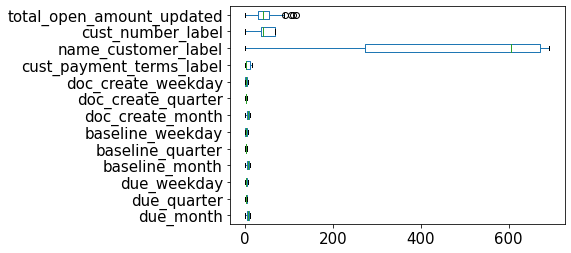

In [ ]:
## Plotting boxplot on x_train1(No Scaling)

boxplot1 = x_train1.boxplot(grid=False, vert=False,fontsize=15)

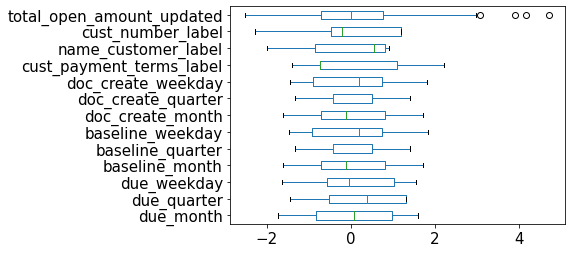

In [ ]:
## Plotting boxplot on X_train_scaled(Standardised data)

boxplot2 = X_train_scaled.boxplot(grid=False, vert=False,fontsize=15)

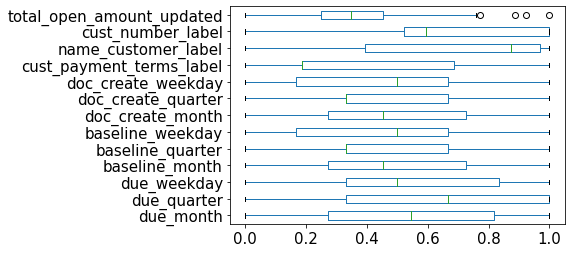

In [ ]:
## Plotting boxplot on X_train_norm(Normalized data)

boxplot3 = X_train_norm.boxplot(grid=False, vert=False,fontsize=15)

 The features are now more comparable and will have a similar effect on the learning models.

##**Feature Selection**

**Filter Method**

In [ ]:
## To get the number of non constant features

constant_filter = VarianceThreshold(threshold=0)
#we need to simply apply this filter to our training set 
constant_filter.fit(x_train1)
#the number of non-constant features.
len(x_train1.columns[constant_filter.get_support()])

13

In [ ]:
## To get the number of constant features 

constant_columns = [column for column in x_train1.columns
                    if column not in x_train1.columns[constant_filter.get_support()]]

print(len(constant_columns))

0


In [ ]:
x_train1_T = x_train1.T
# print the number of duplicated features
print(x_train1_T.duplicated().sum())
# select the duplicated features columns names
duplicated_columns = x_train1_T[x_train1_T.duplicated()].index.values

0


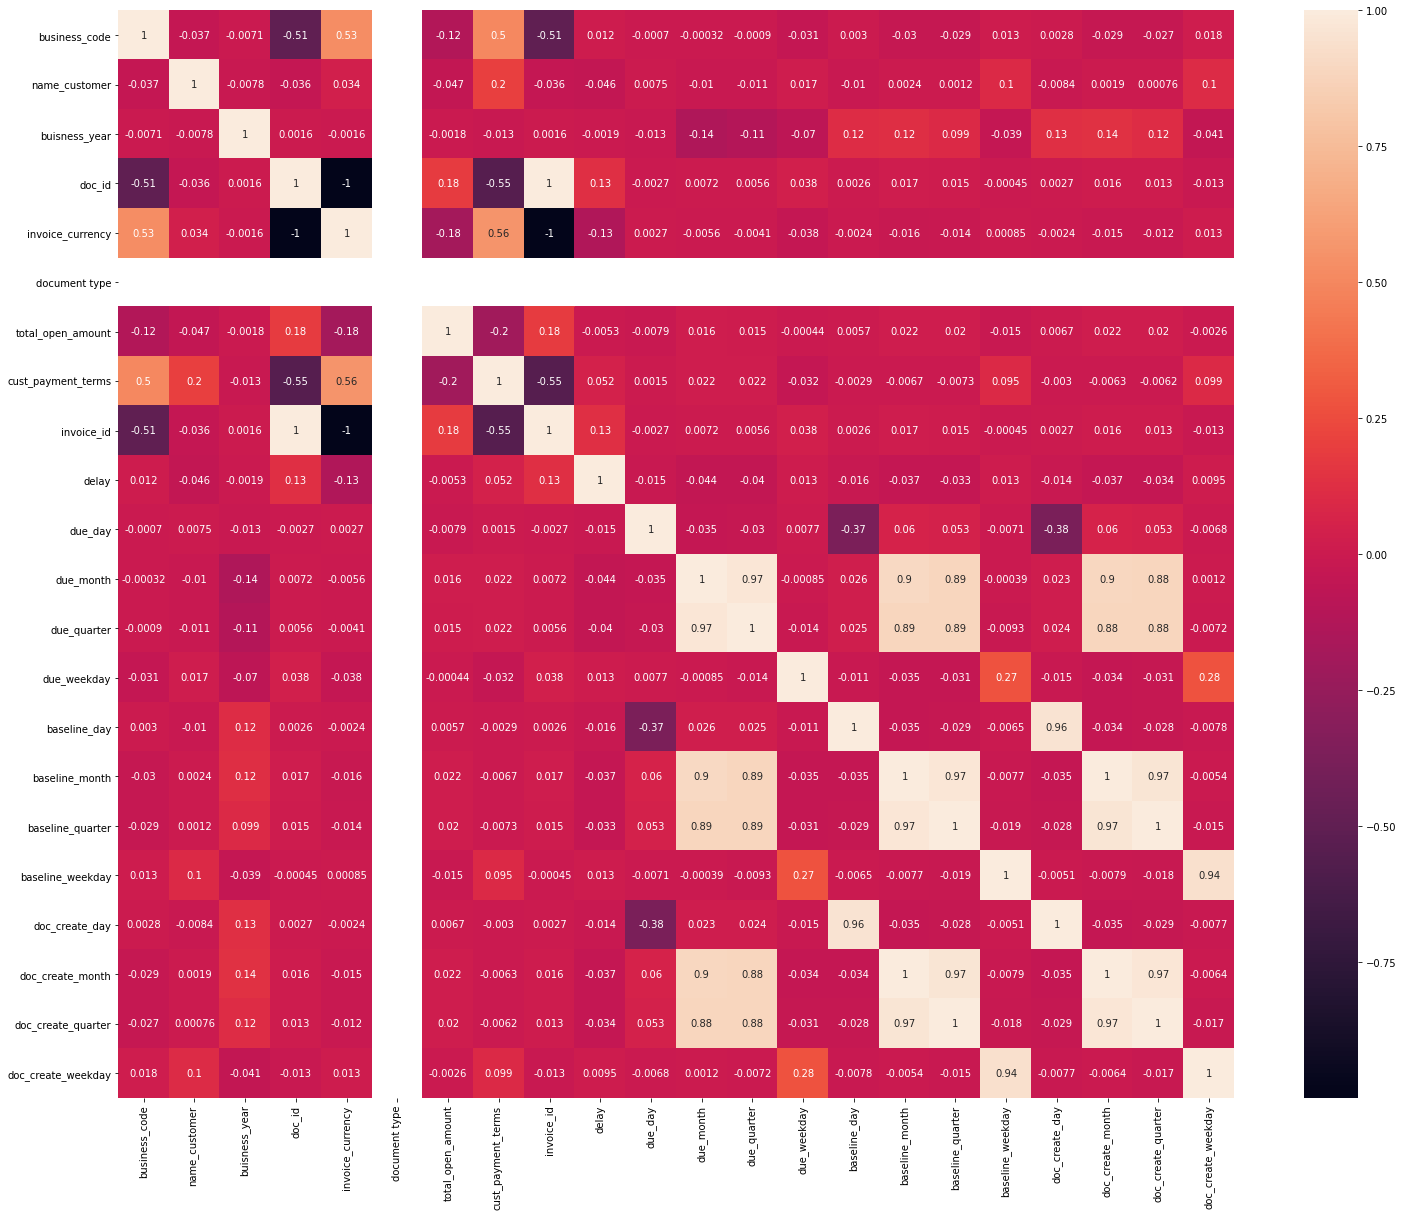

In [ ]:
## Plotting the heat map to find the correlation

correlation_train=train.corr()
plt.figure(figsize=(25,20))
sns.heatmap(correlation_train,annot=True)

In [ ]:
## Determining the feature which have high correlation as very highly correlated features will affect the others feature

def handling_correlation(df,threshold=0.8):
    # creating set to hold the correlated features
    corr_features = set()
    # create the correlation matrix (default to pearson)
    corr_matrix = df.corr()
    #code for selecting all correleated features
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

In [ ]:
#in the time of checking co-relation we have to check with target also that's why I am passing out output_label also
handling_correlation(x_train1.copy(),0.8)

['doc_create_weekday',
 'due_quarter',
 'doc_create_month',
 'baseline_month',
 'doc_create_quarter',
 'baseline_quarter']

In [ ]:
## Dropping all the highly correlated features to get an unbiased model

x_train_new=x_train1.drop(['doc_create_weekday',
 'baseline_quarter',
 'doc_create_quarter',
 'due_quarter',
 'baseline_month',
 'doc_create_month'],axis=1)

##**Embedded method**
**Tree-based**

In [ ]:
## Building a function that will return the important features

def tree_based_feature_importance(x_train_new,y_train):
    
    # create the random forest model
    model = RandomForestRegressor(n_estimators=120)

    # fit the model to start training.
    model.fit(x_train_new, y_train)

    # get the importance of the resulting features.
    importances = model.feature_importances_

    # create a data frame for visualization.
    final_df = pd.DataFrame({"Features": x_train_new.columns, "Importances":importances})
    final_df.set_index('Importances')

    # sort in descending order 
    final_df = final_df.sort_values('Importances',ascending=False)
    
    #visualising feature importance
    pd.Series(model.feature_importances_, index=x_train_new.columns).nlargest(6).plot(kind='barh')  
    return final_df

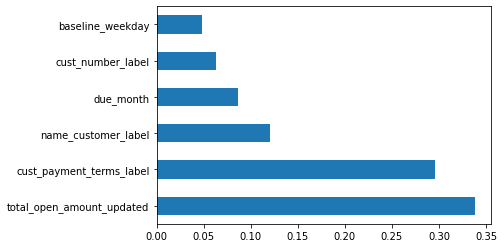

In [ ]:
##Getting the importance features from the train set

feature_importance=tree_based_feature_importance(x_train_new,y_train)

In [ ]:
## Displaying the important features with it's importance

display(feature_importance)

,Features,Importances
6,total_open_amount_updated,0.338820
3,cust_payment_terms_label,0.296344
4,name_customer_label,0.119997
0,due_month,0.086263
5,cust_number_label,0.063214
2,baseline_weekday,0.047831
1,due_weekday,0.047529


In [ ]:
x_train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38162 entries, 0 to 38161
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   due_month                  38162 non-null  int64  
 1   due_weekday                38162 non-null  int64  
 2   baseline_weekday           38162 non-null  int64  
 3   cust_payment_terms_label   38162 non-null  int64  
 4   name_customer_label        38162 non-null  int64  
 5   cust_number_label          38162 non-null  int64  
 6   total_open_amount_updated  38162 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 2.0 MB


####Creating Dataframe with important features

In [ ]:
## Building a train set with only important features i.e., total_open_amount_updated, cust_payment_terms_label,name_customer_label

x_train_new1=x_train_new.drop(['baseline_weekday','due_weekday','cust_number_label','due_month'],axis=1)

In [ ]:
## Sumarising the train set with important features

x_train_new1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38162 entries, 0 to 38161
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   cust_payment_terms_label   38162 non-null  int64  
 1   name_customer_label        38162 non-null  int64  
 2   total_open_amount_updated  38162 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 894.5 KB


In [ ]:
## Building a validaton and test set with only important features

x_validation_new1=x_validation1.drop(['doc_create_weekday',
 'baseline_quarter',
 'doc_create_quarter',
 'due_quarter',
 'baseline_month',
 'doc_create_month','baseline_weekday','due_weekday','cust_number_label','due_month'],axis=1)

x_test_new1=x_test1.drop(['doc_create_weekday',
 'baseline_quarter',
 'doc_create_quarter',
 'due_quarter',
 'baseline_month',
 'doc_create_month','baseline_weekday','due_weekday','cust_number_label','due_month'],axis=1)

In [ ]:
## Building a standardised train, validation and test set with only important features

X_train_scaled1=X_train_scaled.drop(['doc_create_weekday',
 'baseline_quarter',
 'doc_create_quarter',
 'due_quarter',
 'baseline_month',
 'doc_create_month','baseline_weekday','due_weekday','cust_number_label','due_month'],axis=1)

X_validation_scaled1=X_validation_scaled.drop(['doc_create_weekday',
 'baseline_quarter',
 'doc_create_quarter',
 'due_quarter',
 'baseline_month',
 'doc_create_month','baseline_weekday','due_weekday','cust_number_label','due_month'],axis=1)

X_test_scaled1=X_test_scaled.drop(['doc_create_weekday',
 'baseline_quarter',
 'doc_create_quarter',
 'due_quarter',
 'baseline_month',
 'doc_create_month','baseline_weekday','due_weekday','cust_number_label','due_month'],axis=1)


In [ ]:
## Building a normalized train, validation and test set with only important features

X_train_norm1=X_train_norm.drop(['doc_create_weekday',
 'baseline_quarter',
 'doc_create_quarter',
 'due_quarter',
 'baseline_month',
 'doc_create_month','baseline_weekday','due_weekday','cust_number_label','due_month'],axis=1)

X_validation_norm1=X_validation_norm.drop(['doc_create_weekday',
 'baseline_quarter',
 'doc_create_quarter',
 'due_quarter',
 'baseline_month',
 'doc_create_month','baseline_weekday','due_weekday','cust_number_label','due_month'],axis=1)

X_test_norm1=X_test_norm.drop(['doc_create_weekday',
 'baseline_quarter',
 'doc_create_quarter',
 'due_quarter',
 'baseline_month',
 'doc_create_month','baseline_weekday','due_weekday','cust_number_label','due_month'],axis=1)

##**Model Building**

###**Support Vector Regressor**

In [ ]:
# Support Vector Regressor
svr = SVR()

rmse = []
mse = []

# raw, normalized and standardized training and testing data
trainX = [x_train_new1, X_train_norm1, X_train_scaled1]
testX = [x_test_new1, X_test_norm1, X_test_scaled1]

# model fitting and measuring RMSE and MSE
for i in range(len(trainX)):
    
    # fit
    svr.fit(trainX[i],y_train)
    # predict
    pred = svr.predict(testX[i])
    # RMSE(Root mean square error)
    rmse.append(np.sqrt(mean_squared_error(y_test,pred)))
    # MSE (Mean square error)
    mse.append(mean_squared_error(y_test,pred))

# visualizing the result    
df_svr = pd.DataFrame({'RMSE':rmse,'MSE':mse},index=['Original','Normalized','Standardized'])
df_svr


,RMSE,MSE
Original,12.252728,150.129347
Normalized,10.739562,115.338198
Standardized,10.662045,113.679207


###**Decision Tree Regressor**

In [ ]:
# Decision tree
dt = DecisionTreeRegressor()

rmse = []
mse = []
# raw, normalized and standardized training and testing data
trainX = [x_train_new1, X_train_norm1, X_train_scaled1]
testX = [x_test_new1, X_test_norm1, X_test_scaled1]

# model fitting and measuring RMSE and MSE
for i in range(len(trainX)):
    
    # fit
    dt.fit(trainX[i],y_train)
    # predict
    pred = dt.predict(testX[i])
    # RMSE(Root mean square error)
    rmse.append(np.sqrt(mean_squared_error(y_test,pred)))
    # MSE (Mean square error)
    mse.append(mean_squared_error(y_test,pred))

# visualizing the result    
df_dt = pd.DataFrame({'RMSE':rmse,'MSE':mse},index=['Original','Normalized','Standardized'])
df_dt

,RMSE,MSE
Original,19.885664,395.439631
Normalized,24.535179,601.975027
Standardized,11.561882,133.677109


###**Random Forest Regressor**

In [ ]:
# Random Forest Regressor
dt = RandomForestRegressor()

rmse = []
mse = []

# raw, normalized and standardized training and testing data
trainX = [x_train_new1, X_train_norm1, X_train_scaled1]
testX = [x_test_new1, X_test_norm1, X_test_scaled1]

# model fitting and measuring RMSE and MSE
for i in range(len(trainX)):
    
    # fit
    dt.fit(trainX[i],y_train)
    # predict
    pred = dt.predict(testX[i])
    # RMSE(Root mean square error)
    rmse.append(np.sqrt(mean_squared_error(y_test,pred)))
    # MSE (Mean square error)
    mse.append(mean_squared_error(y_test,pred))

# visualizing the result    
df_dt = pd.DataFrame({'RMSE':rmse,'MSE':mse},index=['Original','Normalized','Standardized'])
df_dt

,RMSE,MSE
Original,12.783213,163.410524
Normalized,17.621780,310.527135
Standardized,10.443083,109.057981


###**Linear Regression**

In [ ]:
# Linear Regression
dt = LinearRegression()

rmse = []
mse = []

# raw, normalized and standardized training and testing data
trainX = [x_train_new1, X_train_norm1, X_train_scaled1]
testX = [x_test_new1, X_test_norm1, X_test_scaled1]

# model fitting and measuring RMSE and MSE
for i in range(len(trainX)):
    
    # fit
    dt.fit(trainX[i],y_train)
    # predict
    pred = dt.predict(testX[i])
    # RMSE(Root mean square error)
    rmse.append(np.sqrt(mean_squared_error(y_test,pred)))
    # MSE (Mean square error)
    mse.append(mean_squared_error(y_test,pred))

# visualizing the result    
df_dt = pd.DataFrame({'RMSE':rmse,'MSE':mse},index=['Original','Normalized','Standardized'])
df_dt

,RMSE,MSE
Original,640.926297,410786.517907
Normalized,12.230982,149.596913
Standardized,12.192046,148.645995


###**XGBoost Regressor**

In [ ]:
# XGBoost Regressor
dt = xgb.XGBRegressor()

rmse = []
mse = []

# raw, normalized and standardized training and testing data
trainX = [x_train_new1, X_train_norm1, X_train_scaled1]
testX = [x_test_new1, X_test_norm1, X_test_scaled1]

# model fitting and measuring RMSE and MSE
for i in range(len(trainX)):
    
    # fit
    dt.fit(trainX[i],y_train)
    # predict
    pred = dt.predict(testX[i])
    # RMSE(Root mean square error)
    rmse.append(np.sqrt(mean_squared_error(y_test,pred)))
    # MSE (Mean square error)
    mse.append(mean_squared_error(y_test,pred))

# visualizing the result    
df_dt = pd.DataFrame({'RMSE':rmse,'MSE':mse},index=['Original','Normalized','Standardized'])
df_dt

[09:41:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:41:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:41:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,RMSE,MSE
Original,11.622882,135.091397
Normalized,10.264702,105.364104
Standardized,9.360671,87.622158


By analyzing all the model above Random Forest Regressor is giving a good result with the unscaled data.

So choosing Random Forest Regressor


##**Hyperparameter Tuning on Validation Set**
*Hyperparameter tuning is done on Validation Set*

Using `Random Forest Regressor` as final model so we need to do hyperparameter tuning to get a good result in our prediction

`bootstrap`:bool, default=True

Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.


`max_features`:{“auto”, “sqrt”, “log2”}, int or float, default=”auto”

The number of features to consider when looking for the best split

`max_depth`:int, default=None

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.


`n_estimators`:int, default=100

The number of trees in the forest.

In [ ]:
## Using Random Forest Regressor as final model
ffr = RandomForestRegressor()

## Fitting the model
ffr.fit(x_train_new1,y_train)

##Printing the score
print(ffr.score(x_validation_new1,y_validation))

-0.4127950060624952


In [ ]:
##GridSearchCV
##Passing parameters manually and allowing the grid search to choose the best suited parameters

param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, 15, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20]}

In [ ]:
## Creating an object of Random Forest Regressor
rfr = RandomForestRegressor(random_state = 1)

## Running GridSearchCV
g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, 

                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

# Fit
g_search.fit(x_train_new1,y_train);

## Printing the best parameters
print(g_search.best_params_)

{'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 20}


In [ ]:
## Predicting the score of GridSearchCV

print(g_search.score(x_validation_new1,y_validation))

-0.9217803797582576


In [ ]:
## RandomizedSearchCV
## Giving an array on numbers to each parameters to choose among those the best ones

n_estimators = [int(x) for x in np.linspace(start = 5 , stop = 20, num = 15)] # returns 15 numbers 

max_features = ['auto', 'log2']

max_depth = [int(x) for x in np.linspace(5, 15, num = 3)] 

max_depth.append(None)

bootstrap = [True, False]

## Running RandomSearchCV
r_grid = {'n_estimators': n_estimators,

               'max_features': max_features,

               'max_depth': max_depth,

               'bootstrap': bootstrap}

rfr_random = RandomizedSearchCV(estimator=rfr, param_distributions=r_grid, n_iter = 20, scoring='neg_mean_absolute_error', cv = 3, verbose=2, random_state=42, n_jobs=-1, return_train_score=True)

## Fit
rfr_random.fit(x_train_new1,y_train);

##Printing the best parameters
print(rfr_random.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   23.3s finished


{'n_estimators': 8, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': False}


In [ ]:
## Printing the best Parameters after RandomSearchCV

print(rfr_random.best_params_)

{'n_estimators': 8, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': False}


In [ ]:
## Printing the score after RandomSearchCV 

print(rfr_random.score(x_validation_new1,y_validation))

-3.926692480815648


Going with the parameters of RandomSearchCV 

##**Final Prediction on test set**

In [ ]:
rf = RandomForestRegressor(bootstrap=False, max_depth= 10, max_features='log2', n_estimators= 8)

rmse = []
mse = []

#  training and testing data
trainX1 = [x_train_new1]
testX1 = [x_test_new1]

# model fitting and measuring RMSE
for i in range(len(trainX1)):
    
    # fit
    rf.fit(trainX1[i],y_train)
    # predict
    pred = rf.predict(testX1[i])
    # RMSE(Root mean square error)
    rmse.append(np.sqrt(mean_squared_error(y_test,pred)))
    # MSE (Mean square error)
    mse.append(mean_squared_error(y_test,pred))

# visualizing the result    
df_dt = pd.DataFrame({'RMSE':rmse,'MSE':mse},index=['Original'])
df_dt


,RMSE,MSE
Original,10.966398,120.261894


##**Predicting the Delay**

In [ ]:
## Testing dataframe is that dataframe which have its clear_date equal to null
## Getting the summary of the Testing dataframe

Testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           4082 non-null   object 
 1   cust_number             4082 non-null   object 
 2   name_customer           4082 non-null   object 
 3   clear_date              0 non-null      object 
 4   buisness_year           4082 non-null   float64
 5   doc_id                  4082 non-null   float64
 6   posting_date            4082 non-null   object 
 7   document_create_date    4082 non-null   int64  
 8   document_create_date.1  4082 non-null   int64  
 9   due_in_date             4082 non-null   float64
 10  invoice_currency        4082 non-null   object 
 11  document type           4082 non-null   object 
 12  posting_id              4082 non-null   float64
 13  area_business           0 non-null      float64
 14  total_open_amount       4082 non-null   

*Performing all the necessary feature engineering on Testing dataset*

In [ ]:
## Converting the necessary columns to the datetime format which was previously object type or int type or  float type
##‘coerce’, then invalid parsing will be set as NaN

Testing['clear_date']= pd.to_datetime(Testing['clear_date'])
Testing['posting_date']= pd.to_datetime(Testing['posting_date'])
Testing['document_create_date'] = pd.to_datetime(Testing['document_create_date'], format='%Y%m%d',errors='coerce')  
Testing['document_create_date.1'] = pd.to_datetime(Testing['document_create_date.1'], format='%Y%m%d',errors='coerce')  
Testing['due_in_date'] = pd.to_datetime(Testing['due_in_date'], format='%Y%m%d',errors='coerce')  
Testing['baseline_create_date'] = pd.to_datetime(Testing['baseline_create_date'], format='%Y%m%d',errors='coerce')

In [ ]:
## Getting all the unique values from name_customer and then counting them and setting a threshold value and storing them into
## seperate variables 
## final_labels contain the unique name_customer which are above the threshold value 
## Terming all the values below the threshold as others

Labels = x_train['name_customer'].unique()
Data = x_train['name_customer'].value_counts()
threshold_val = 0.01 * x_train['name_customer'].value_counts().max()
final_labels = [x for x in Labels if Data[x]>threshold_val]
le=le = LabelEncoder() 
x_train['name_customer_label'] = pd.Series([x if x in final_labels else 'others' for x in x_train['name_customer']])
Testing['name_customer_label'] = pd.Series([x if x in final_labels else 'others' for x in Testing['name_customer']])

## Applying fit_transform in x_train and transform in Testing
## Storing all the encoded data in a new column name name_customer_label

x_train['name_customer_label']= le.fit_transform(x_train['name_customer_label'])
Testing['name_customer_label'] = le.transform(Testing['name_customer_label'])

In [ ]:
## Getting all the unique values from cust_payment_terms and then counting them and setting a threshold value and storing them into
## seperate variables 
## final_labels contain the unique cust_payment_terms which are above the threshold value 
## Terming all the values below the threshold as others

Labels = x_train['cust_payment_terms'].unique()
Data = x_train['cust_payment_terms'].value_counts()
threshold_val = 0.01 * x_train['cust_payment_terms'].value_counts().max()
final_labels = [x for x in Labels if Data[x]>threshold_val]
le=le = LabelEncoder() 
x_train['cust_payment_terms_label'] = pd.Series([x if x in final_labels else 'others' for x in x_train['cust_payment_terms']])
Testing['cust_payment_terms_label'] = pd.Series([x if x in final_labels else 'others' for x in Testing['cust_payment_terms']])

## Applying fit_transform in x_train and transform in Testing 
## Storing all the encoded data in a new column name cust_payment_terms_label

x_train['cust_payment_terms_label']= le.fit_transform(x_train['cust_payment_terms_label'])
Testing['cust_payment_terms_label'] = le.transform(Testing['cust_payment_terms_label'])

In [ ]:
## Converting CAD to USD to maintain uniformity in the currency and storing it into a new column in Testing

Testing['total_open_amount_updated'] = np.where(Testing['invoice_currency'] == 'CAD', Testing['total_open_amount'].multiply(0.78),Testing['total_open_amount'] )
Testing['invoice_currency_updated'] = np.where(Testing['invoice_currency'] == 'CAD', 'USD','USD')

In [ ]:
## Getting the summary of the Testing dataset after performing necessary transformations

Testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   business_code              4082 non-null   object        
 1   cust_number                4082 non-null   object        
 2   name_customer              4082 non-null   object        
 3   clear_date                 0 non-null      datetime64[ns]
 4   buisness_year              4082 non-null   float64       
 5   doc_id                     4082 non-null   float64       
 6   posting_date               4082 non-null   datetime64[ns]
 7   document_create_date       4082 non-null   datetime64[ns]
 8   document_create_date.1     4082 non-null   datetime64[ns]
 9   due_in_date                4082 non-null   datetime64[ns]
 10  invoice_currency           4082 non-null   object        
 11  document type              4082 non-null   object        
 12  postin

In [ ]:
## Creating a new dataframe with only important features

Main_test = Testing[['total_open_amount_updated', 'name_customer_label', 'cust_payment_terms_label']].copy()
Main_test.reset_index(drop=True)  ## Resetting the index

,total_open_amount_updated,name_customer_label,cust_payment_terms_label
0,62417.9400,497,3
1,61.6900,59,3
2,32976.3500,668,11
3,89481.1100,693,7
4,12788.5800,693,10
...,...,...,...
4077,169.3200,693,16
4078,661.1100,673,11
4079,15530.5800,693,3
4080,12412.7600,693,3


In [ ]:
## Getting the summary of the new dataframe created with important features

Main_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   total_open_amount_updated  4082 non-null   float64
 1   name_customer_label        4082 non-null   int64  
 2   cust_payment_terms_label   4082 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 95.8 KB


In [ ]:
## Predicting the delay by fitting our model on the new dataframe created

predicted_delay=rf.predict(Main_test)

In [ ]:
## Printing the predicted delay

predicted_delay

array([24.25862069, -8.375     , 41.60389785, ..., 12.16042348,
       12.16042348, 10.91042348])

In [ ]:
## As the numbers are in decimal so rounding them off to the nearest integer

predicted_delay1=np.around(predicted_delay)

In [ ]:
## Printing the predicted delay after rounding them off

predicted_delay1

array([24., -8., 42., ..., 12., 12., 11.])

In [ ]:
## Changing the numpy array into a dataframe with predicted delay column

predict_delay=pd.DataFrame(predicted_delay1, columns=['delay_predicted']) 

In [ ]:
## Printing the predict_delay dataframe 

predict_delay

,delay_predicted
0,24.0
1,-8.0
2,42.0
3,-4.0
4,-9.0
...,...
4077,-4.0
4078,13.0
4079,12.0
4080,12.0


##**Predicting the payment**

In [ ]:
## Concatinating the Testing and predict_delay datadrame and creating a new dataframe named final

final=pd.concat([Testing, predict_delay], axis=1)

In [ ]:
## Printing the first 5 values of the final dataframe

final.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,name_customer_label,cust_payment_terms_label,total_open_amount_updated,invoice_currency_updated,delay_predicted
0,U001,0200772595,SAFEW trust,NaT,2020.0,1.930577e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,NaN,62417.94,2020-02-27,NAA8,1.930577e+09,1,497,3,62417.94,USD,24.0
1,U001,0200726979,BJ'S systems,NaT,2020.0,1.930578e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,NaN,61.69,2020-02-27,NAA8,1.930578e+09,1,59,3,61.69,USD,-8.0
2,U001,0200769623,WAL-MAR foundation,NaT,2020.0,1.930576e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,NaN,32976.35,2020-02-27,NAH4,1.930576e+09,1,668,11,32976.35,USD,42.0
3,U001,0200980828,BEN E corp,NaT,2020.0,1.930577e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-18,USD,RV,1.0,NaN,89481.11,2020-02-27,NAD1,1.930577e+09,1,693,7,89481.11,USD,-4.0
4,U001,0200779051,AFFILI,NaT,2020.0,1.930581e+09,2020-02-27,2020-02-28,2020-02-27,2020-05-02,USD,RV,1.0,NaN,12788.58,2020-02-27,NAGD,1.930581e+09,1,693,10,12788.58,USD,-9.0


In [ ]:
## Resetting the index for the new dataframe

final.reset_index(drop=True)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,name_customer_label,cust_payment_terms_label,total_open_amount_updated,invoice_currency_updated,delay_predicted
0,U001,0200772595,SAFEW trust,NaT,2020.0,1.930577e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,NaN,62417.94,2020-02-27,NAA8,1.930577e+09,1,497,3,62417.9400,USD,24.0
1,U001,0200726979,BJ'S systems,NaT,2020.0,1.930578e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,NaN,61.69,2020-02-27,NAA8,1.930578e+09,1,59,3,61.6900,USD,-8.0
2,U001,0200769623,WAL-MAR foundation,NaT,2020.0,1.930576e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,NaN,32976.35,2020-02-27,NAH4,1.930576e+09,1,668,11,32976.3500,USD,42.0
3,U001,0200980828,BEN E corp,NaT,2020.0,1.930577e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-18,USD,RV,1.0,NaN,89481.11,2020-02-27,NAD1,1.930577e+09,1,693,7,89481.1100,USD,-4.0
4,U001,0200779051,AFFILI,NaT,2020.0,1.930581e+09,2020-02-27,2020-02-28,2020-02-27,2020-05-02,USD,RV,1.0,NaN,12788.58,2020-02-27,NAGD,1.930581e+09,1,693,10,12788.5800,USD,-9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,U001,0200592182,DECA trust,NaT,2020.0,1.930887e+09,2020-05-12,2020-05-12,2020-05-12,2020-05-24,USD,RV,1.0,NaN,169.32,2020-05-01,NAM4,1.930887e+09,1,693,16,169.3200,USD,-4.0
4078,U001,200769623,WAL-MAR us,NaT,2020.0,1.930887e+09,2020-05-12,2020-05-11,2020-05-12,2020-05-27,USD,RV,1.0,NaN,661.11,2020-05-12,NAH4,1.930887e+09,1,673,11,661.1100,USD,13.0
4079,U001,0200763229,MAINES llc,NaT,2020.0,1.930906e+09,2020-05-15,2020-05-15,2020-05-15,2020-05-30,USD,RV,1.0,NaN,15530.58,2020-05-15,NAA8,1.930906e+09,1,693,3,15530.5800,USD,12.0
4080,U001,0200763229,MAINES us,NaT,2020.0,1.930902e+09,2020-05-15,2020-05-15,2020-05-15,2020-05-30,USD,RV,1.0,NaN,12412.76,2020-05-15,NAA8,1.930902e+09,1,693,3,12412.7600,USD,12.0


In [ ]:
## Getting the summary of dataframe

final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   business_code              4082 non-null   object        
 1   cust_number                4082 non-null   object        
 2   name_customer              4082 non-null   object        
 3   clear_date                 0 non-null      datetime64[ns]
 4   buisness_year              4082 non-null   float64       
 5   doc_id                     4082 non-null   float64       
 6   posting_date               4082 non-null   datetime64[ns]
 7   document_create_date       4082 non-null   datetime64[ns]
 8   document_create_date.1     4082 non-null   datetime64[ns]
 9   due_in_date                4082 non-null   datetime64[ns]
 10  invoice_currency           4082 non-null   object        
 11  document type              4082 non-null   object        
 12  postin

In [ ]:
## Changing the datatype of delay_predict column from float to int

final['delay_predicted'] = final['delay_predicted'].astype(int) 

In [ ]:
## Calculating the prdicted_payment_date by adding the delay_predicted and due_in_date

final['due_in_date'] = pd.to_datetime(final['due_in_date'])

## Changing the delay_predicted into days form and storing into a temporary variable

delay_temp = final['delay_predicted'].apply(np.ceil).apply(lambda x: pd.Timedelta(x, unit='D')) 

## Adding the due_in_date and temp_delay to get the prdicted_payment_date and storing this date into a new column

final['prdicted_payment_date'] = final['due_in_date'] + delay_temp

In [ ]:
## Printing the first 5 values of the final dataframe

final.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,name_customer_label,cust_payment_terms_label,total_open_amount_updated,invoice_currency_updated,delay_predicted,prdicted_payment_date
0,U001,0200772595,SAFEW trust,NaT,2020.0,1.930577e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,NaN,62417.94,2020-02-27,NAA8,1.930577e+09,1,497,3,62417.94,USD,24,2020-04-06
1,U001,0200726979,BJ'S systems,NaT,2020.0,1.930578e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,NaN,61.69,2020-02-27,NAA8,1.930578e+09,1,59,3,61.69,USD,-8,2020-03-05
2,U001,0200769623,WAL-MAR foundation,NaT,2020.0,1.930576e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,NaN,32976.35,2020-02-27,NAH4,1.930576e+09,1,668,11,32976.35,USD,42,2020-04-24
3,U001,0200980828,BEN E corp,NaT,2020.0,1.930577e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-18,USD,RV,1.0,NaN,89481.11,2020-02-27,NAD1,1.930577e+09,1,693,7,89481.11,USD,-4,2020-03-14
4,U001,0200779051,AFFILI,NaT,2020.0,1.930581e+09,2020-02-27,2020-02-28,2020-02-27,2020-05-02,USD,RV,1.0,NaN,12788.58,2020-02-27,NAGD,1.930581e+09,1,693,10,12788.58,USD,-9,2020-04-23


##**Aging Bucket based on the delay**

In [ ]:
## Creating the aging_buckets and predicting the aging buckets according to the predicted delay

bins= [1,16,31,46,61,501]       ## Creating bins
labels = ['0-15 days','16-30 days','31-45 days','46-60 days','Greater than 60 days']    ## Creating Labels
final['Predicted_Aging_Buckets'] = pd.cut(final['delay_predicted'], bins=bins, labels=labels, right=False)   ##Bucketising the values 

In [ ]:
## Printing the final dataframe

final

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,name_customer_label,cust_payment_terms_label,total_open_amount_updated,invoice_currency_updated,delay_predicted,prdicted_payment_date,Predicted_Aging_Buckets
0,U001,0200772595,SAFEW trust,NaT,2020.0,1.930577e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,NaN,62417.94,2020-02-27,NAA8,1.930577e+09,1,497,3,62417.9400,USD,24,2020-04-06,16-30 days
1,U001,0200726979,BJ'S systems,NaT,2020.0,1.930578e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,NaN,61.69,2020-02-27,NAA8,1.930578e+09,1,59,3,61.6900,USD,-8,2020-03-05,NaN
2,U001,0200769623,WAL-MAR foundation,NaT,2020.0,1.930576e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,NaN,32976.35,2020-02-27,NAH4,1.930576e+09,1,668,11,32976.3500,USD,42,2020-04-24,31-45 days
3,U001,0200980828,BEN E corp,NaT,2020.0,1.930577e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-18,USD,RV,1.0,NaN,89481.11,2020-02-27,NAD1,1.930577e+09,1,693,7,89481.1100,USD,-4,2020-03-14,NaN
4,U001,0200779051,AFFILI,NaT,2020.0,1.930581e+09,2020-02-27,2020-02-28,2020-02-27,2020-05-02,USD,RV,1.0,NaN,12788.58,2020-02-27,NAGD,1.930581e+09,1,693,10,12788.5800,USD,-9,2020-04-23,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,U001,0200592182,DECA trust,NaT,2020.0,1.930887e+09,2020-05-12,2020-05-12,2020-05-12,2020-05-24,USD,RV,1.0,NaN,169.32,2020-05-01,NAM4,1.930887e+09,1,693,16,169.3200,USD,-4,2020-05-20,NaN
4078,U001,200769623,WAL-MAR us,NaT,2020.0,1.930887e+09,2020-05-12,2020-05-11,2020-05-12,2020-05-27,USD,RV,1.0,NaN,661.11,2020-05-12,NAH4,1.930887e+09,1,673,11,661.1100,USD,13,2020-06-09,0-15 days
4079,U001,0200763229,MAINES llc,NaT,2020.0,1.930906e+09,2020-05-15,2020-05-15,2020-05-15,2020-05-30,USD,RV,1.0,NaN,15530.58,2020-05-15,NAA8,1.930906e+09,1,693,3,15530.5800,USD,12,2020-06-11,0-15 days
4080,U001,0200763229,MAINES us,NaT,2020.0,1.930902e+09,2020-05-15,2020-05-15,2020-05-15,2020-05-30,USD,RV,1.0,NaN,12412.76,2020-05-15,NAA8,1.930902e+09,1,693,3,12412.7600,USD,12,2020-06-11,0-15 days


In [ ]:
## Removing the data which have anomalies in them

final1= final[(final['document_create_date.1'] <= final['posting_date']) & (final['posting_date'] <=final['baseline_create_date']) & (final['baseline_create_date']<=final['due_in_date'])].copy()
final1.reset_index(drop=True)  ## Resetting the index value

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,name_customer_label,cust_payment_terms_label,total_open_amount_updated,invoice_currency_updated,delay_predicted,prdicted_payment_date,Predicted_Aging_Buckets
0,U001,0200772595,SAFEW trust,NaT,2020.0,1.930577e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,NaN,62417.94,2020-02-27,NAA8,1.930577e+09,1,497,3,62417.9400,USD,24,2020-04-06,16-30 days
1,U001,0200726979,BJ'S systems,NaT,2020.0,1.930578e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,NaN,61.69,2020-02-27,NAA8,1.930578e+09,1,59,3,61.6900,USD,-8,2020-03-05,NaN
2,U001,0200769623,WAL-MAR foundation,NaT,2020.0,1.930576e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,NaN,32976.35,2020-02-27,NAH4,1.930576e+09,1,668,11,32976.3500,USD,42,2020-04-24,31-45 days
3,U001,0200980828,BEN E corp,NaT,2020.0,1.930577e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-18,USD,RV,1.0,NaN,89481.11,2020-02-27,NAD1,1.930577e+09,1,693,7,89481.1100,USD,-4,2020-03-14,NaN
4,U001,0200779051,AFFILI,NaT,2020.0,1.930581e+09,2020-02-27,2020-02-28,2020-02-27,2020-05-02,USD,RV,1.0,NaN,12788.58,2020-02-27,NAGD,1.930581e+09,1,693,10,12788.5800,USD,-9,2020-04-23,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3902,U001,200769623,WAL-MAR llc,NaT,2020.0,1.930893e+09,2020-05-12,2020-05-12,2020-05-12,2020-05-27,USD,RV,1.0,NaN,30411.35,2020-05-12,NAH4,1.930893e+09,1,670,11,30411.3500,USD,18,2020-06-14,16-30 days
3903,U001,200769623,WAL-MAR us,NaT,2020.0,1.930887e+09,2020-05-12,2020-05-11,2020-05-12,2020-05-27,USD,RV,1.0,NaN,661.11,2020-05-12,NAH4,1.930887e+09,1,673,11,661.1100,USD,13,2020-06-09,0-15 days
3904,U001,0200763229,MAINES llc,NaT,2020.0,1.930906e+09,2020-05-15,2020-05-15,2020-05-15,2020-05-30,USD,RV,1.0,NaN,15530.58,2020-05-15,NAA8,1.930906e+09,1,693,3,15530.5800,USD,12,2020-06-11,0-15 days
3905,U001,0200763229,MAINES us,NaT,2020.0,1.930902e+09,2020-05-15,2020-05-15,2020-05-15,2020-05-30,USD,RV,1.0,NaN,12412.76,2020-05-15,NAA8,1.930902e+09,1,693,3,12412.7600,USD,12,2020-06-11,0-15 days


In [ ]:
## Creating the final dataframe which contains the 'prdicted_payment_date','Predicted_Aging_Buckets'

Final_data= final1[['prdicted_payment_date','Predicted_Aging_Buckets']].copy()
Final_data.reset_index(drop=True)     ## Resetting the index value

,prdicted_payment_date,Predicted_Aging_Buckets
0,2020-04-06,16-30 days
1,2020-03-05,NaN
2,2020-04-24,31-45 days
3,2020-03-14,NaN
4,2020-04-23,NaN
...,...,...
3902,2020-06-14,16-30 days
3903,2020-06-09,0-15 days
3904,2020-06-11,0-15 days
3905,2020-06-11,0-15 days
